# Capstone Project

## Applied Data Science Capstone by IBM / Coursera

## Table of contents
* [1.Introduction: Business Problem](#introduction)
* [2.Data Description and Cleansing](#data)
* [3.Methodology](#methodology)
* [4.Results](#results)
* [5.Discussion](#discussion)
* [6.Conclusion](#conclusion)



## 1. Introduction: Business Problem <a name="introduction"></a>

UK is a world-famous tourist city. Tourism in UK is a fast growing business.The fast-growing tourism market means more tourists, which means more places are required for tourists to stay over the night.

This project will focus on finding an optimal location for a hotel. Since London is a large city, this report is targeted to stakeholders who are interested in **opening a hotel in Inner London**, UK.

## 2. Data Description and Cleansing <a name="data"></a>

### 2.1 Data Components

After reviewing several literatures, 
* Hotel agglomeration effect, 
* Accessibility to transports,
* Tourist Attractions

are selected as the key factors when it comes to select a hotel location in this project.

### 2.2 Data Sources

2.2.1. Inner London Geography Related 
* London areas & postal code from **Wikipedia**
* London areas & postal code location data from **Geocoder Python Package**
* Inner London boroughs from **Wikipedia**
* London shapefile from **London Datastore**. 
By using QGIS (a desktop geographic information system application), London shapefile can be transformed to GeoJson data.

2.2.2. Hotel Agglomeration Effect:
* Hotel location data will be obtained by using **Foursquare API**

2.2.3. Accessibility to Transports
* Transports location (bus stop, bus station, light rail station, metro station, train station) data will be obtained by using **Foursquare API**

2.2.4. Tourist Attractions
* Tourist attractions data will be obtained by using **TripAdvisor**

### 2.3 Data Cleaning

#### Inner London Geography Data

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup
import requests

In [2]:
source=requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text
soup=BeautifulSoup(source,'lxml')

df=pd.DataFrame()

for tr in soup.find_all('tr'):
    string=tr.text
    tablelist=string.split('\n')
    df=df.append([tablelist])
    

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [3]:
df

0    \
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
..                                                ...   
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                                       
0                                  vteAreas of London   
0                             Central activities zone   
0                     Town centrenetworkInternational   
0                                       International   
0                                        Metropolitan   
0                                               Major   
0                                Districts(principal)   
0                           Neighbourhoods(principal)   
0                            Lists of areasby borough   
0                                           Fictional   
0   The London Plan 2011, Annex Two: London's Town...   

                                                  1    \
0   Map all coordinates in "Category:Areas of Lond...   
0                  Download coordinates as: KML · GPX   
0                                            Location   
0                                          Abbey Wood   
0                                               Acton   
0                                           Addington   
0                                          Addiscombe   
0                                         Albany Park   
0 

In [4]:
london_postcode=pd.DataFrame()
london_postcode=df[[1,2,4]]
london_postcode.columns=['Sub-District','London Borough','Postcode']
london_postcode.index=range(0,len(london_postcode))

london_postcode=london_postcode.iloc[3:536]
london_postcode.index=range(0,len(london_postcode))

london_postcode

Sub-District  \
0                                    Abbey Wood   
1                                         Acton   
2                                     Addington   
3                                    Addiscombe   
4                                   Albany Park   
5                              Aldborough Hatch   
6                                       Aldgate   
7                                       Aldwych   
8                                      Alperton   
9                                       Anerley   
10                                        Angel   
11                                    Aperfield   
12                                      Archway   
13                               Ardleigh Green   
14                                       Arkley   
15                                  Arnos Grove   
16                                       Balham   
17                                     Bankside   
18                                     Barbican   
19                                      Barking   
20                                  Barkingside   
21                                   Barnehurst   
22                                       Barnes   
23                                  Barnes Cray   
24                                  Barnet Gate   
25   Barnet (also Chipping Barnet, High Barnet)   
26                                    Barnsbury   
27                                    Battersea   
28                                    Bayswater   
29                                    Beckenham   
..                                          ...   
503                                West Hackney   
504                                    West Ham   
505                              West Hampstead   
506                                 West Harrow   
507                                  West Heath   
508                                 West Hendon   
509                             West Kensington   
510                                West Norwood   
511                                West Wickham   
512                              Westcombe Park   
513                                 Westminster   
514                                   Whetstone   
515                                  White City   
516                                 Whitechapel   
517                Widmore (also Widmore Green)   
518                                     Whitton   
519                                   Willesden   
520                                   Wimbledon   
521                              Winchmore Hill   
522                                  Wood Green   
523                                    Woodford   
524                              Woodford Green   
525                                   Woodlands   
526                                    Woodside   
527                               Woodside Park   
528                                    Woolwich   
529                              Worcester Park   
530                             Wormwood Scrubs   
531                                     Yeading   
532                                    Yiewsley   

                        London Borough    Postcode  
0               Bexley,  Greenwich [7]         SE2  
1    Ealing, Hammersmith and Fulham[8]      W3, W4  
2                           Croydon[8]         CR0  
3                           Croydon[8]         CR0  
4                               Bexley   DA5, DA14  
5                         Redbridge[9]         IG2  
6                             City[10]         EC3  
7                      Westminster[10]         WC2  
8                            Brent[11]         HA0  
9                          Bromley[11]        SE20  
10                        Islington[8]     EC1, N1  
11                         Bromley[11]        TN16  
12                       Islington[12]         N19  
13                        Havering[12]        RM11  
14                          Barnet[12]    EN5, NW7  
15                      

In [5]:
# sub-district with single postcode
single_postcode=london_postcode[~london_postcode['Postcode'].str.contains(',')]

# sub-district with more than one postcode
dup_postcode=london_postcode[london_postcode['Postcode'].str.contains(',')]
dup_postcode.index=range(0,len(dup_postcode))
dup_postcode

Sub-District                     London Borough  \
0                                Acton  Ealing, Hammersmith and Fulham[8]   
1                          Albany Park                             Bexley   
2                                Angel                       Islington[8]   
3                               Arkley                         Barnet[12]   
4                          Arnos Grove                        Enfield[12]   
5                          Barnet Gate                             Barnet   
6                            Beckenham                        Bromley[20]   
7                              Beckton                         Newham[20]   
8                           Beddington                         Sutton[21]   
9                              Belmont                         Harrow[22]   
10  Bexleyheath (also Bexley New Town)                         Bexley[26]   
11           Blackheath Royal Standard                          Greenwich   
12                        Bounds Green                       Haringey[31]   
13                         Brent Cross                             Barnet   
14                             Brixton                        Lambeth[34]   
15                         Bulls Cross                        Enfield[38]   
16                               Cheam                             Sutton   
17                        Colney Hatch                             Barnet   
18                      Crystal Palace                            Bromley   
19                            Dagenham               Barking and Dagenham   
20                              Ealing                             Ealing   
21                         Earls Court             Kensington and Chelsea   
22                            Eastcote                         Hillingdon   
23                            Edmonton                            Enfield   
24                 Elephant and Castle                          Southwark   
25                        Enfield Town                            Enfield   
26                               Erith                             Bexley   
27                          Falconwood                  Bexley, Greenwich   
28                             Feltham                           Hounslow   
29                            Finchley                             Barnet   
..                                 ...                                ...   
57                          Queensbury                      Harrow, Brent   
58                            Richmond               Richmond upon Thames   
59                              Ruxley                    Bexley, Bromley   
60                         Shacklewell                            Hackney   
61                              Sidcup                             Bexley   
62                    South Kensington             Kensington and Chelsea   
63                     South Tottenham                           Haringey   
64                            Southall                             Ealing   
65                         Southfields                         Wandsworth   
66                       Stamford Hill                            Hackney   
67                           Stockwell                            Lambeth   
68                     Strawberry Hill               Richmond upon Thames   
69                             Sudbury              Brent, Ealing, Harrow   
70                            Surbiton               Kingston upon Thames   
71                              Sutton                             Sutton   
72                       Sydenham Hill                Lewisham, Southwark   
73                              Temple                  City, Westminster   
74                          Thamesmead                  Bexley, Greenwich   
75                            Tolworth               Kingston upon Thames   
76                           Tottenham                           Haringey   
77                    

In [6]:
# special postcode
dup_postcode.iloc[16,2]='SM1,SM2,SM3'

# seperate dup_postcode
dup_postcode['A'],dup_postcode['B'],dup_postcode['C'],dup_postcode['D'],dup_postcode['E']=dup_postcode['Postcode'].str.split(',',4).str

dup_1=dup_postcode[['Sub-District','London Borough','A']]
dup_1.columns=['Sub-District','London Borough','Postcode']

dup_2=dup_postcode[['Sub-District','London Borough','B']]
dup_2.columns=['Sub-District','London Borough','Postcode']

dup_3=dup_postcode[['Sub-District','London Borough','C']]
dup_3=dup_3.dropna(axis=0)
dup_3.columns=['Sub-District','London Borough','Postcode']

dup_4=dup_postcode[['Sub-District','London Borough','D']]
dup_4=dup_4.dropna(axis=0)
dup_4.columns=['Sub-District','London Borough','Postcode']

dup_5=dup_postcode[['Sub-District','London Borough','E']]
dup_5=dup_5.dropna(axis=0)
dup_5.columns=['Sub-District','London Borough','Postcode']

single_postcode2=pd.concat([dup_1,dup_2,dup_3,dup_4,dup_5],axis=0)
single_postcode2.sort_values(by='Sub-District')

# combine the postcode together
london_post=pd.concat([single_postcode,single_postcode2],axis=0)
london_post.sort_values(by='London Borough',inplace=True)
london_post.index=range(0,len(london_post))
london_post

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Sub-District            London Borough Postcode
0                         Rush Green      Barking and Dagenham      RM7
1                           Dagenham      Barking and Dagenham     RM10
2                         Creekmouth      Barking and Dagenham     IG11
3                         Marks Gate      Barking and Dagenham      RM6
4                       Castle Green      Barking and Dagenham      RM9
5                           Dagenham      Barking and Dagenham      RM9
6                            Barking  Barking and Dagenham[14]     IG11
7                          Becontree  Barking and Dagenham[20]      RM9
8                    Becontree Heath  Barking and Dagenham[21]      RM8
9                        Barnet Gate                    Barnet      NW7
10                     Woodside Park                    Barnet      N12
11           Hampstead Garden Suburb                    Barnet       N2
12                       East Barnet                    Barnet      EN4
13                       West Hendon                    Barnet      NW9
14                          Finchley                    Barnet       N2
15                        Totteridge                    Barnet      N20
16                           Edgware                    Barnet      HA8
17                       Brent Cross                    Barnet      NW2
18                         Whetstone                    Barnet      N20
19                      Colney Hatch                    Barnet      N11
20                            Osidge                    Barnet      N14
21                     Oakleigh Park                    Barnet      N20
22                    North Finchley                    Barnet      N12
23                       Childs Hill                    Barnet      NW2
24                     New Southgate                    Barnet      N11
25                     Monken Hadley                    Barnet      EN5
26                         Mill Hill                    Barnet      NW7
27                        Church End                    Barnet       N3
28                     Golders Green                    Barnet     NW11
29                         Colindale                    Barnet      NW9
..                               ...                       ...      ...
608                      Southfields                Wandsworth     SW18
609                           Putney                Wandsworth     SW15
610                       Earlsfield                Wandsworth     SW18
611                        Nine Elms                Wandsworth      SW8
612                          Tooting                Wandsworth     SW17
613                      Tooting Bec                Wandsworth     SW17
614                      Southfields                Wandsworth     SW19
615                       Wandsworth                Wandsworth     SW18
616                           Balham            Wandsworth[13]     SW12
617                        Battersea            Wandsworth[18]     SW11
618  Marylebone (also St Marylebone)               Westminster       W1
619                         Millbank               Westminster      SW1
620                       Paddington               Westminster       W2
621                    Little Venice               Westminster       W2
622                          Mayfair               Westminster       W1
623                        Chinatown               Westminster       W1
624                          Pimlico               Westminster      SW1
625                      Westminster               Westminster      SW1
626                       Maida Vale               Westminster       W9
627                    Charing Cross               Westminster      WC2
628                     Lisson Grove               Westminster      NW8
629                             Soho               Westminster       W1
630                    Little Venice               Westminster       W9
631                       St James's               Westminster  

In [7]:
# clean the data with '[ ]'
london=pd.DataFrame()
london=london_post

special_set=pd.DataFrame()
normal_set=pd.DataFrame()
special_set=london[london['London Borough'].str.contains('\[')]
normal_set=london[~london['London Borough'].str.contains('\[')]

special_set_clear=pd.DataFrame()
for a in special_set['London Borough']:
    clear=a.split('[')
    special_set_clear=special_set_clear.append([clear[0]]) #select the valid string

special_set_clear=special_set_clear.reset_index(drop=True)
special_set=special_set.reset_index(drop=True)

specialset=pd.DataFrame()
specialset=pd.concat([special_set,special_set_clear],axis=1)
specialset.columns=['Sub-District','London Borough Pre','Postcode','London Borough']
london_special=specialset[['Sub-District','London Borough','Postcode']]

In [8]:
# postcode for each sub-district
london_con=pd.DataFrame()
london_con=pd.concat([normal_set,london_special],axis=0)
london_con.sort_values(by='Postcode',inplace=True)
london_con.reset_index(drop=True)

Sub-District  \
0                          Upper Ruxley   
1                                Ruxley   
2                             Orpington   
3                            Beddington   
4                           Albany Park   
5                             Longlands   
6                                Sidcup   
7                             Longlands   
8                            Falconwood   
9                            Thamesmead   
10                                Erith   
11   Bexleyheath (also Bexley New Town)   
12                           Upton Park   
13                               Leyton   
14                             West Ham   
15                              Beckton   
16                             Woodford   
17                              Hackney   
18                              Hackney   
19                         Enfield Town   
20                          Bulls Cross   
21                          Ponders End   
22                           New Barnet   
23                          Barnet Gate   
24                              Sudbury   
25                         North Harrow   
26                             Eastcote   
27                              Belmont   
28                           Queensbury   
29                           Queensbury   
..                                  ...   
608     Marylebone (also St Marylebone)   
609                             Mayfair   
610                    North Kensington   
611                        Notting Hill   
612                     Wormwood Scrubs   
613                     Shepherd's Bush   
614                          White City   
615                         West Ealing   
616                     West Kensington   
617                           Bayswater   
618                          Paddington   
619                               Acton   
620                          Grove Park   
621                            Chiswick   
622                        Bedford Park   
623                         Gunnersbury   
624                              Ealing   
625                         Hammersmith   
626                             Hanwell   
627                        Holland Park   
628                       Little Venice   
629                          Maida Vale   
630                             Holborn   
631                          Bloomsbury   
632                        King's Cross   
633                          St Pancras   
634                            St Giles   
635                       Charing Cross   
636                             Aldwych   
637                       Covent Garden   

                               London Borough Postcode  
0                             Bexley, Bromley      BR5  
1                             Bexley, Bromley      BR5  
2                                     Bromley      BR6  
3                                      Sutton      CR0  
4                                      Bexley     DA14  
5                                      Bexley     DA14  
6                                      Bexley     DA15  
7                                      Bexley     DA15  
8                           Bexley, Greenwich     DA16  
9                           Bexley, Greenwich     DA18  
10                                     Bexley     DA18  
11                                     Bexley      DA7  
12                                     Newham      E13  
13                             Waltham Forest      E15  
14                                     Newham      E15  
15                                     Newham      E16  
16                                  Redbridge      E18  
17                                    Hackney       E8  
18                                    Hackney       E9  
19                                    Enfield      EN2  
20                                    Enfield      EN3  
21                                    Enfield      EN3  
22                                     Barnet    

In [9]:
# 可删
london_con.to_csv('t_london_postcode_all',index=False)

In [10]:
# sub-district in inner london with postcode
inner_london=london_con[london_con['London Borough'].str.contains('Camden|Greenwich|Hackney|Hammersmith and Fulham|Islington|Kensington and Chelsea|Lambeth|Lewisham|Southwark|Tower Hamlets|Wandsworth|Westminster|City of London')]
inner_london.reset_index(drop=True)

Sub-District  \
0                         Falconwood   
1                         Thamesmead   
2                            Hackney   
3                            Hackney   
4                            Hackney   
5                              Angel   
6                      Stamford Hill   
7                        Shacklewell   
8                            Hackney   
9                       Tufnell Park   
10                        Gospel Oak   
11                     Primrose Hill   
12                     Primrose Hill   
13                              Oval   
14               Elephant and Castle   
15         Blackheath Royal Standard   
16                          Ladywell   
17                         Newington   
18               Elephant and Castle   
19                        Thamesmead   
20                     Sydenham Hill   
21                        Gipsy Hill   
22                        Tulse Hill   
23                           Brixton   
24                       Earls Court   
25                       Southfields   
26                  South Kensington   
27                  South Kensington   
28                              Oval   
29                           Brixton   
..                               ...   
196                         Vauxhall   
197                        Nine Elms   
198                             Oval   
199                        Fitzrovia   
200                        Chinatown   
201                             Soho   
202  Marylebone (also St Marylebone)   
203                          Mayfair   
204                 North Kensington   
205                     Notting Hill   
206                  Wormwood Scrubs   
207                  Shepherd's Bush   
208                       White City   
209                  West Kensington   
210                        Bayswater   
211                       Paddington   
212                            Acton   
213                         Chiswick   
214                      Hammersmith   
215                     Holland Park   
216                    Little Venice   
217                       Maida Vale   
218                          Holborn   
219                       Bloomsbury   
220                     King's Cross   
221                       St Pancras   
222                         St Giles   
223                    Charing Cross   
224                          Aldwych   
225                    Covent Garden   

                               London Borough Postcode  
0                           Bexley, Greenwich     DA16  
1                           Bexley, Greenwich     DA18  
2                                     Hackney       E8  
3                                     Hackney       E9  
4                                     Hackney       N1  
5                                   Islington       N1  
6                                     Hackney      N16  
7                                     Hackney      N16  
8                                     Hackney      N16  
9                           Islington, Camden      N19  
10                                     Camden      NW3  
11                                     Camden      NW3  
12                                     Camden      NW8  
13                                    Lambeth     SE11  
14                                  Southwark     SE11  
15                                  Greenwich     SE12  
16                                   Lewisham     SE13  
17                                  Southwark     SE17  
18                                  Southwark     SE17  
19                          Bexley, Greenwich      SE2  
20                        Lewisham, Southwark     SE26  
21                                    Lambeth     SE27  
22                                    Lambeth     SE27  
23                                    Lambeth      SE5  
24                     Kensington and Chelsea     SW10  
25                                 Wandsworth     SW19  
26  

In [11]:
# Group the same postcode
post_group=pd.DataFrame()
post_group=inner_london[['Sub-District','London Borough','Postcode']].groupby(['Postcode','London Borough'])\
    .apply(lambda x:','.join(x['Sub-District'])).reset_index()
post_group.columns=['Postcode','London Borough','Areas']
post_group.sort_values(by='Postcode',inplace=True)
post_group.reset_index(drop=True)
postalcodes=inner_london.Postcode.drop_duplicates()
postalcodes.index=range(0,len(postalcodes))
postalcodes

0       DA16
1       DA18
2         E8
3         E9
4         N1
5        N16
6        N19
7        NW3
8        NW8
9       SE11
10      SE12
11      SE13
12      SE17
13       SE2
14      SE26
15      SE27
16       SE5
17      SW10
18      SW19
19       SW3
20       SW5
21       SW9
22       W11
23       W14
24        W2
25        W4
26       WC2
27       BR1
28        E1
29       E10
       ...  
78       SE8
79       SE9
80       SW1
81      SW10
82      SW11
83      SW12
84      SW15
85      SW16
86      SW17
87      SW18
88       SW2
89       SW3
90       SW4
91       SW5
92       SW6
93       SW7
94       SW8
95        W1
96       W10
97       W11
98       W12
99       W14
100       W2
101       W3
102       W4
103       W6
104       W8
105       W9
106      WC1
107      WC2
Name: Postcode, Length: 108, dtype: object

In [12]:
# get postalcodes GPS
# !conda install -c conda-forge geocoder -y
import geocoder

column_names=['Postcode','Latitude','Longitude']
london_gps=pd.DataFrame(columns=column_names)

for post in postalcodes:    
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{},London,LDN'.format(post))
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    london_gps=london_gps.append({'Postcode':post,
                                 'Latitude':latitude,
                                 'Longitude':longitude},
                                ignore_index=True)

In [13]:
# merge post_group and postalcode GPS togeter
inner_london_gps=pd.DataFrame()
inner_london_gps=pd.merge(post_group,london_gps,how='left',on='Postcode')
inner_london_gps.sort_values(by='Postcode')

Postcode                                London Borough  \
0       DA16                             Bexley, Greenwich   
1       DA18                             Bexley, Greenwich   
2         E8                                       Hackney   
3         E9                                       Hackney   
4         N1                                       Hackney   
5         N1                                     Islington   
6        N16                                       Hackney   
7        N19                             Islington, Camden   
8        NW3                                        Camden   
9        NW8                                        Camden   
10      SE11                                       Lambeth   
11      SE11                                     Southwark   
12      SE12                                     Greenwich   
13      SE13                                      Lewisham   
14      SE17                                     Southwark   
15       SE2                             Bexley, Greenwich   
16      SE26                           Lewisham, Southwark   
17      SE27                                       Lambeth   
18       SE5                                       Lambeth   
19      SW10                        Kensington and Chelsea   
20      SW19                                    Wandsworth   
21       SW3                        Kensington and Chelsea   
22       SW5                        Kensington and Chelsea   
23       SW9                                       Lambeth   
24       W11                        Kensington and Chelsea   
25       W14                        Kensington and Chelsea   
26        W2                                   Westminster   
27        W4                Ealing, Hammersmith and Fulham   
28       WC2                                        Camden   
29       WC2                             City, Westminster   
..       ...                                           ...   
97      SW12                                    Wandsworth   
98      SW15                                    Wandsworth   
99      SW16                                       Lambeth   
100     SW17                                    Wandsworth   
101     SW18                                    Wandsworth   
102      SW2                                       Lambeth   
103      SW3                        Kensington and Chelsea   
104      SW3  Kensington and ChelseaHammersmith and Fulham   
105      SW4                           Lambeth, Wandsworth   
106      SW5                        Kensington and Chelsea   
107      SW6                        Hammersmith and Fulham   
108      SW7                        Kensington and Chelsea   
109      SW8                                       Lambeth   
110      SW8                                    Wandsworth   
112       W1                                        Camden   
111       W1                                   Westminster   
113      W10                        Kensington and Chelsea   
114      W11                        Kensington and Chelsea   
115      W12                        Hammersmith and Fulham   
116      W14                        Hammersmith and Fulham   
117       W2                                   Westminster   
118       W3                Ealing, Hammersmith and Fulham   
119       W4      Hounslow, Ealing, Hammersmith and Fulham   
120       W6                        Hammersmith and Fulham   
121       W8                        Kensington and Chelsea   
122       W9                                   Westminster   
123      WC1                                        Camden   
124      WC1                          Camden and Islington   
125      WC2                                        Camden   
126      WC2                                   Westminster   

                                                 Areas   Latitude  Longitude  
0                                           Falconwood  51.459075   0.099121  
1

In [14]:
# 可删
inner_london_gps.to_csv('t_inner_london_postcode_gps',index=False)

#### Hotel Location Data from FourSquare

In [15]:
import random # library for random number generation

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium

In [16]:
inner_london_gps

Postcode                                London Borough  \
0       DA16                             Bexley, Greenwich   
1       DA18                             Bexley, Greenwich   
2         E8                                       Hackney   
3         E9                                       Hackney   
4         N1                                       Hackney   
5         N1                                     Islington   
6        N16                                       Hackney   
7        N19                             Islington, Camden   
8        NW3                                        Camden   
9        NW8                                        Camden   
10      SE11                                       Lambeth   
11      SE11                                     Southwark   
12      SE12                                     Greenwich   
13      SE13                                      Lewisham   
14      SE17                                     Southwark   
15       SE2                             Bexley, Greenwich   
16      SE26                           Lewisham, Southwark   
17      SE27                                       Lambeth   
18       SE5                                       Lambeth   
19      SW10                        Kensington and Chelsea   
20      SW19                                    Wandsworth   
21       SW3                        Kensington and Chelsea   
22       SW5                        Kensington and Chelsea   
23       SW9                                       Lambeth   
24       W11                        Kensington and Chelsea   
25       W14                        Kensington and Chelsea   
26        W2                                   Westminster   
27        W4                Ealing, Hammersmith and Fulham   
28       WC2                                        Camden   
29       WC2                             City, Westminster   
..       ...                                           ...   
97      SW12                                    Wandsworth   
98      SW15                                    Wandsworth   
99      SW16                                       Lambeth   
100     SW17                                    Wandsworth   
101     SW18                                    Wandsworth   
102      SW2                                       Lambeth   
103      SW3                        Kensington and Chelsea   
104      SW3  Kensington and ChelseaHammersmith and Fulham   
105      SW4                           Lambeth, Wandsworth   
106      SW5                        Kensington and Chelsea   
107      SW6                        Hammersmith and Fulham   
108      SW7                        Kensington and Chelsea   
109      SW8                                       Lambeth   
110      SW8                                    Wandsworth   
111       W1                                   Westminster   
112       W1                                        Camden   
113      W10                        Kensington and Chelsea   
114      W11                        Kensington and Chelsea   
115      W12                        Hammersmith and Fulham   
116      W14                        Hammersmith and Fulham   
117       W2                                   Westminster   
118       W3                Ealing, Hammersmith and Fulham   
119       W4      Hounslow, Ealing, Hammersmith and Fulham   
120       W6                        Hammersmith and Fulham   
121       W8                        Kensington and Chelsea   
122       W9                                   Westminster   
123      WC1                                        Camden   
124      WC1                          Camden and Islington   
125      WC2                                        Camden   
126      WC2                                   Westminster   

                                                 Areas   Latitude  Longitude  
0                                           Falconwood  51.459075   0.099121  
1

In [17]:
address='London'

geolocator=Nominatim(user_agent="To_explorer")
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of London are 51.5073219, -0.1276474.


#### CLIENT_ID, CLIENT_SECRET, VERSION Details are removed.

In [19]:
search_query = 'Hotel'
radius=500
limit=50
dataframe_sum=pd.DataFrame()

for area,lat,lng in zip(inner_london_gps['Areas'],inner_london_gps['Latitude'],inner_london_gps['Longitude']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID,CLIENT_SECRET,lat,lng,VERSION,search_query,radius,limit)
    #print(url)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe_sum=dataframe_sum.append(dataframe)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_sum.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe_sum.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


C:\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


name  \
0                               KIP Hotel   
0                       Grand Eagle Hotel   
1                         Helmshore Hotel   
2                               The Eagle   
0                          Hotel Chocolat   
1               The Hotel Alternative Ltd   
2           Hilton London Angel Islington   
3      Premier Inn London Angel Islington   
0                          Hotel Chocolat   
1               The Hotel Alternative Ltd   
2           Hilton London Angel Islington   
3      Premier Inn London Angel Islington   
0                         Krystal's Hotel   
1                               Hotel Bar   
2                          Hargrave Hotel   
3                                 SO Arch   
4              Premier Inn London Archway   
0             Premier Inn London Lewisham   
0                   Eurotraveller Express   
0                           Norwood Hotel   
0                     Church Street Hotel   
1                      The New Dome Hotel   
0                      Suit Hotel Chelsea   
1                Beech Hill Hotel Limited   
2                   Cranley Gardens hotel   
0                      Justin James Hotel   
1                   Worcester House Hotel   
0                     Sloane Square Hotel   
1                          Draycott Hotel   
2                      The Draycott Hotel   
..                                    ...   
20                     The Hoxton Holborn   
21              Cosmo Bedford House Hotel   
22                           Morgan Hotel   
23                         Hotel Chocolat   
24                 Grange Clarendon Hotel   
25               Strand Continental Hotel   
26                                  Radio   
27                    Endell Street Hotel   
28            Paul O'Gorman Patient Hotel   
29  The Bar At Radisson Bloomsburry Hotel   
30                          Bedfort Hotel   
31                Grange Buckingham Hotel   
32                  Gym @ Me London Hotel   
33                         Lonsdale Hotel   
34         Bedford Hotel-Breakfast Lounge   
35                   Waverley house hotel   
36                       The Thanet Hotel   
37                           Ruskin Hotel   
38                            Scarfes Bar   
39                   Citadines Aparthotel   
40                     The Waldorf Hilton   
41        Travelodge London Covent Garden   
42                Rosewood Fitness Center   
43                Montague on the Gardens   
44                           American Bar   
45          Thistle Holborn, The Kingsley   
46                                 Homage   
47                                 Indigo   
48             Premier Inn London Holborn   
49                       DW Fitness First   

                                  categories  \
0                                      Hotel   
0                             Boarding House   
1                                       None   
2                                        Pub   
0                             Chocolate Shop   
1                                      Hotel   
2                                      Hotel   
3                                      Hotel   
0                             Chocolate Shop   
1                                      Hotel   
2                                      Hotel   
3                                      Hotel   
0                                      Hotel   
1                                  Hotel Bar   
2                                      Hotel   
3                                      Hotel   
4                                      Hotel   
0                                      Hotel   
0                                      Hotel   
0                                        Pub   
0                                      Hotel   
1                                      Hotel   
0   Residential Building (Apartment / Condo)   
1                                     Resort   
2                                      Hotel  

In [20]:
# select only hotel category
hotel_gps=dataframe_filtered[dataframe_filtered['categories'].str.contains('Hotel',na=False)]

# drop the duplicates
hotel_gps.drop_duplicates(subset=['lat'],keep='first',inplace=True)

# 可删
hotel_gps.to_csv('t_hotel_gps',index=False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Transports Location Data from FourSquare

In [21]:
search_queries = ['Bus Station','Bus Stop','Light Rail Station','Metro Station','Train Station']
radius=350
limit=50
dataframe_trans=pd.DataFrame()

for search_query in search_queries:  
    for area,lat,lng in zip(inner_london_gps['Areas'],inner_london_gps['Latitude'],inner_london_gps['Longitude']):
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
                CLIENT_ID,CLIENT_SECRET,lat,lng,VERSION,search_query,radius,limit)
        print(url2)
        results2 = requests.get(url2).json()
        # assign relevant part of JSON to venues
        venues2 = results2['response']['venues']
        # tranform venues into a dataframe
        dataframe2 = json_normalize(venues2)
        dataframe_trans=dataframe_trans.append(dataframe2)

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45907500000004,0.0991206960000568&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.498845000000074,0.1466047580000236&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=20180605&query

C:\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56350000000003,-0.07312999999993508&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56393000000003,-0.12944999999996298&v=20180605&qu

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.52702000000005,-0.02593999999993457&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.558970000000045,-0.05322999999992817&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=20180605&q

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.44759000000005,0.013500000000021828&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.46196000000003,-0.007539999999949032&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47489000000007,-0.04037999999997055&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47218000000004,-0.0677899999999454&v=20180605&qu

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.43037000000004,-0.1655799999999772&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45066000000003,-0.18996999999995978&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.452950000000044,-0.12082999999995536&v=20180605&query=Bus Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.49014000000005,-0.16247999999995955&v=20180605&qu

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56350000000003,-0.07312999999993508&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56393000000003,-0.12944999999996298&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.555060000000026,-0.1734799999999268&v=20180605&query=Bus S

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.558970000000045,-0.05322999999992817&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.523610000000076,-0.09876999999994496&v=20180605&query=Bus

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.46196000000003,-0.007539999999949032&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47489000000007,-0.04037999999997055&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47218000000004,-0.0677899999999454&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.49574000000007,-0.051569999999969696&v=20180605&query=Bus 

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45066000000003,-0.18996999999995978&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.452950000000044,-0.12082999999995536&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.49014000000005,-0.16247999999995955&v=20180605&query=Bus Stop&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.49014000000005,-0.16247999999995955&v=20180605&query=Bus 

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56350000000003,-0.07312999999993508&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56393000000003,-0.12944999999996298&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.555060000000026,-0.1734799999999268&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53398000000004,-0.1737799999

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.558970000000045,-0.05322999999992817&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.523610000000076,-0.09876999

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.44759000000005,0.013500000000021828&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.46196000000003,-0.007539999999949032&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47489000000007,-0.04037999999997055&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47218000000004,-0.067789999

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.41870000000006,-0.12752999999997883&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.43037000000004,-0.1655799999999772&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45066000000003,-0.18996999999995978&v=20180605&query=Light Rail Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.452950000000044,-0.1208299999

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56350000000003,-0.07312999999993508&v=20180

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.52669000000003,-0.06256999999993695&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.52702000000005,-0.02593999999993457&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.558970000000045,-0.05322999999992817&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=2018

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.44759000000005,0.013500000000021828&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.44759000000005,0.013500000000021828&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.46196000000003,-0.007539999999949032&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47489000000007,-0.04037999999997055&v=2018

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.41870000000006,-0.12752999999997883&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.43037000000004,-0.1655799999999772&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45066000000003,-0.18996999999995978&v=20180605&query=Metro Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.452950000000044,-0.12082999999995536&v=20180

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53792000000004,-0.09982999999994036&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56350000000003,-0.07312999999993508&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.56393000000003,-0.12944999999996298&v=20180

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.52702000000005,-0.02593999999993457&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.558970000000045,-0.05322999999992817&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.54505000000006,-0.05531999999993786&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.53777000000008,-0.04479999999995243&v=2018

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.44759000000005,0.013500000000021828&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.46196000000003,-0.007539999999949032&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47489000000007,-0.04037999999997055&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.47218000000004,-0.0677899999999454&v=20180

https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.43037000000004,-0.1655799999999772&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.45066000000003,-0.18996999999995978&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.452950000000044,-0.12082999999995536&v=20180605&query=Train Station&radius=350&limit=50
https://api.foursquare.com/v2/venues/search?client_id=GJL024QJI0T3NXAZH4ZC0RGX2C1I50JSSQJ5RYQ1NPRPMQIV &client_secret=SXXJ1IEMGA5JHBM3YJPYCQCKMZAADWCY3O3DGGPH3H4BGD3W &ll=51.49014000000005,-0.16247999999995955&v=20180

In [22]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe_trans.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe_trans.loc[:, filtered_columns2]

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2

name  \
0                Hackney Central Station Bus Stop (H)   
1           Hackney Central London Overground Station   
2                                          Bus Stop A   
3                      Bus Stop B - Hackney Town Hall   
4                      Bus Stop A - Hackney Town Hall   
5                                         TfL Bus 277   
6                             Bus stop A, Graham Road   
7                                        TfL Bus N253   
8                      Bus Stop Lz - St Thomas Square   
9                                          Bus stop K   
10                          Arriva Hackney Bus Garage   
11                       Graham Road Bus Stop, Stop E   
12                                     Tfl Bus Stop D   
13                         Hackney Central Bus Stop T   
14                                     Coffee Station   
15                         Hackney Central Bus Stop J   
16                       Allia Future Business Centre   
17                        Argun Printers & Stationers   
0                       Victoria Park Road Bus Stop X   
1                                    Station Approach   
2                                          The 26 Bus   
0                                          Bus stop E   
1                    Bus Stop P (Saint Mary's Church)   
2                             Cross Street Bus Stop E   
3                                          Bus Stop A   
4                       Bus Stop N @ St Mary's Church   
5                    Essex Road Railway Station (EXR)   
6                                         Bus Stop EA   
7                                          TfL Bus 56   
8                                         Bus  Stop Z   
..                                                ...   
2                  Bus Stop M (54321) Holborn Station   
3                        Bus Stop P - Holborn Station   
4                        Bus Stop K @ Holborn Station   
5                            TfL Santander Cycle Hire   
6                   Southampton Place Docking Station   
7                            TfL Santander Cycle Hire   
8                            TfL Santander Cycle Hire   
9   Little Red Fitness (Personal Training with And...   
10                           TfL Santander Cycle Hire   
11                        IAB Events & Training Space   
12                          PERSONAL TRAINER MARBELLA   
13                         24hr Personal Training Ltd   
14                         Caffé Nero training centre   
15                              The Stationery Office   
0                  Holborn London Underground Station   
1                   Kingsway Holborn Station bus stop   
2                  Bus Stop M (54321) Holborn Station   
3                        Bus Stop P - Holborn Station   
4                        Bus Stop K @ Holborn Station   
5                            TfL Santander Cycle Hire   
6                   Southampton Place Docking Station   
7                            TfL Santander Cycle Hire   
8                            TfL Santander Cycle Hire   
9   Little Red Fitness (Personal Training with And...   
10                           TfL Santander Cycle Hire   
11                        IAB Events & Training Space   
12                          PERSONAL TRAINER MARBELLA   
13                         24hr Personal Training Ltd   
14                         Caffé Nero training centre   
15                              The Stationery Office   

                       categories                        address  cc  \
0                        Bus Stop                        Hackney  GB   
1                   Train Station                     Amhurst Rd  GB   
2                        Bus Stop                            NaN  GB   
3                        Bus Stop                            NaN  GB   
4                        Bus Stop                            NaN  GB   
5                        Bus Line                            NaN  GB   
6         

In [23]:
dataframe_filtered2.index=range(0,len(dataframe_filtered2))
trans_gps=dataframe_filtered2[dataframe_filtered2['categories'].str.contains('Bus Station|Bus Stop|Light Rail Station|Metro Station|Train Station',na=False)]
trans_gps.index=range(0,len(trans_gps))

trans_gps.drop_duplicates(subset=['lat'],keep='first',inplace=True)

# 可删
trans_gps.to_csv('t_trans_gps',index=False)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Tourist Attractions Location Data

In [24]:
# scrap 300 top attractions in London
urls=['https://www.tripadvisor.com/Attractions-g186338-Activities-a_allAttractions.true-London_England.html',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa30-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa60-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa90-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa120-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa150-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa180-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa210-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa240-London_England.html#FILTERED_LIST',
'https://www.tripadvisor.com/Attractions-g186338-Activities-oa270-London_England.html#FILTERED_LIST'
     ]

In [25]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

df_attractions=pd.DataFrame()

for url in urls:
    uClient=uReq(url) # opening up connection,grabbing the page
    page_soup=soup(uClient.read(),"lxml")
    page_soup.body
    
    for x in page_soup.findAll('div',{'class':'listing_rating'}):
        container=x.previous_sibling.previous_sibling
        df_attractions=df_attractions.append([container.text])

df_attractions.columns=['Attractions']
df_attractions.reset_index(drop=True)


attractions=pd.DataFrame()
for a in df_attractions['Attractions']:
    b=a.split('\n')[1]
    attractions=attractions.append([b])
    
attractions.columns=['Attractions']
attractions.reset_index(drop=True)

Attractions
0                         Tower of London
1                            Tower Bridge
2                     Churchill War Rooms
3                        National Gallery
4                      The British Museum
5                       Westminster Abbey
6        V&A - Victoria and Albert Museum
7                          Borough Market
8                    St. Paul's Cathedral
9                  Natural History Museum
10                              Hyde Park
11       Chelsea FC Stadium Tour & Museum
12                          Covent Garden
13                       St. James's Park
14                   Houses of Parliament
15                          Camden Market
16                           Up at The O2
17                             Sky Garden
18       Emirates Stadium Tour and Museum
19                          Regent's Park
20                              Greenwich
21                The View from The Shard
22                      Buckingham Palace
23                   Imperial War Museums
24            Shakespeare's Globe Theatre
25                     Kensington Gardens
26                            HMS Belfast
27                     Wallace Collection
28                      Highgate Cemetery
29             School Of Rock The Musical
..                                    ...
270                Kensington High Street
271               London Victoria Station
272              Westfield Stratford City
273                     Golders Hill Park
274                   Shaftesbury Theatre
275                          Fenton House
276            Garden Lodge Queen, Londra
277                         Knightsbridge
278                       Adelphi Theatre
279                   London Canal Museum
280                       Wellington Arch
281  BT Tower (The British Telecom Tower)
282                       Albert Memorial
283         Southbank Centre Food Markets
284                   County Hall, London
285                    Museum of the Home
286                  The UK Supreme Court
287                        Clarence House
288              Nomadic Community Garden
289            Peter Harrison Planetarium
290    The Museum of the Order of St John
291                          Baker Street
292                  Mudchute Park & Farm
293               Serpentine Boating Lake
294                Golden Jubilee Bridges
295                         Virgin Trains
296                    The Thames Barrier
297                         Spencer House
298                             Bayswater
299                           Shad Thames

[300 rows x 1 columns]

In [26]:
attractions

Attractions
0                        Tower of London
0                           Tower Bridge
0                    Churchill War Rooms
0                       National Gallery
0                     The British Museum
0                      Westminster Abbey
0       V&A - Victoria and Albert Museum
0                         Borough Market
0                   St. Paul's Cathedral
0                 Natural History Museum
0                              Hyde Park
0       Chelsea FC Stadium Tour & Museum
0                          Covent Garden
0                       St. James's Park
0                   Houses of Parliament
0                          Camden Market
0                           Up at The O2
0                             Sky Garden
0       Emirates Stadium Tour and Museum
0                          Regent's Park
0                              Greenwich
0                The View from The Shard
0                      Buckingham Palace
0                   Imperial War Museums
0            Shakespeare's Globe Theatre
0                     Kensington Gardens
0                            HMS Belfast
0                     Wallace Collection
0                      Highgate Cemetery
0             School Of Rock The Musical
..                                   ...
0                 Kensington High Street
0                London Victoria Station
0               Westfield Stratford City
0                      Golders Hill Park
0                    Shaftesbury Theatre
0                           Fenton House
0             Garden Lodge Queen, Londra
0                          Knightsbridge
0                        Adelphi Theatre
0                    London Canal Museum
0                        Wellington Arch
0   BT Tower (The British Telecom Tower)
0                        Albert Memorial
0          Southbank Centre Food Markets
0                    County Hall, London
0                     Museum of the Home
0                   The UK Supreme Court
0                         Clarence House
0               Nomadic Community Garden
0             Peter Harrison Planetarium
0     The Museum of the Order of St John
0                           Baker Street
0                   Mudchute Park & Farm
0                Serpentine Boating Lake
0                 Golden Jubilee Bridges
0                          Virgin Trains
0                     The Thames Barrier
0                          Spencer House
0                              Bayswater
0                            Shad Thames

[300 rows x 1 columns]

In [27]:
column_names=['Attraction_Name','Latitude','Longitude']
attraction_gps=pd.DataFrame(columns=column_names)

for attraction in attractions['Attractions']:
    attraction_name=[]
    attraction_name=attraction+',London,UK'
    lat_lng_coords=None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis(attraction_name)
        lat_lng_coords = g.latlng
        
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    #print(latitude,longitude)
    
    attraction_gps=attraction_gps.append({'Attraction_Name':attraction,
                                          'Latitude':lat_lng_coords[0],
                                          'Longitude':lat_lng_coords[1]},
                                        ignore_index=True)
    
attraction_gps

Attraction_Name   Latitude  Longitude
0                         Tower of London  51.509740  -0.075230
1                            Tower Bridge  51.505480  -0.075380
2                     Churchill War Rooms  51.502250  -0.129020
3                        National Gallery  51.508530  -0.127940
4                      The British Museum  51.518630  -0.125220
5                       Westminster Abbey  51.499980  -0.128330
6        V&A - Victoria and Albert Museum  51.496010  -0.171440
7                          Borough Market  51.499070  -0.100180
8                    St. Paul's Cathedral  51.513440  -0.099740
9                  Natural History Museum  51.495640  -0.175310
10                              Hyde Park  51.508280  -0.161390
11       Chelsea FC Stadium Tour & Museum  51.490140  -0.162480
12                          Covent Garden  51.515440  -0.126930
13                       St. James's Park  51.497130  -0.138290
14                   Houses of Parliament  51.500580  -0.126100
15                          Camden Market  51.540070  -0.143540
16                           Up at The O2  51.500780   0.004880
17                             Sky Garden  51.511617  -0.083338
18       Emirates Stadium Tour and Museum  51.553770  -0.110120
19                          Regent's Park  51.525870  -0.154110
20                              Greenwich  51.484540   0.002750
21                The View from The Shard  51.484276   0.136867
22                      Buckingham Palace  51.501640  -0.141130
23                   Imperial War Museums  51.496750  -0.108610
24            Shakespeare's Globe Theatre  51.508070  -0.096510
25                     Kensington Gardens  51.501940  -0.179540
26                            HMS Belfast  51.505900  -0.081460
27                     Wallace Collection  51.517090  -0.152840
28                      Highgate Cemetery  51.566880  -0.146540
29             School Of Rock The Musical  51.506420  -0.127210
..                                    ...        ...        ...
270                Kensington High Street  51.497139  -0.204574
271               London Victoria Station  51.493890  -0.145390
272              Westfield Stratford City  51.542750  -0.004510
273                     Golders Hill Park  51.568090  -0.183770
274                   Shaftesbury Theatre  51.516320  -0.128770
275                          Fenton House  51.558590  -0.180510
276            Garden Lodge Queen, Londra  51.594356  -0.170112
277                         Knightsbridge  51.501868  -0.160344
278                       Adelphi Theatre  51.509970  -0.122730
279                   London Canal Museum  51.533850  -0.119920
280                       Wellington Arch  51.502560  -0.150020
281  BT Tower (The British Telecom Tower)  51.490478   0.119728
282                       Albert Memorial  51.502190  -0.174250
283         Southbank Centre Food Markets  51.504727  -0.116566
284                   County Hall, London  51.462134  -0.222565
285                    Museum of the Home  51.527563  -0.155975
286                  The UK Supreme Court  51.437117  -0.133947
287                        Clarence House  51.485322  -0.093142
288              Nomadic Community Garden  51.548206   0.000266
289            Peter Harrison Planetarium  51.506420  -0.127210
290    The Museum of the Order of St John  51.522000  -0.102730
291                          Baker Street  51.522574  -0.157741
292                  Mudchute Park & Farm  51.491890  -0.007660
293               Serpentine Boating Lake  51.502241  -0.160449
294                Golden Jubilee Bridges  51.505340  -0.118510
295                         Virgin Trains  51.515890  -0.136050
296                    The Thames Barrier  51.493850   0.037740
297                         Spencer House  51.505470  -0.140390
298                             Bayswater  51.510510  -0.184250
299                           Shad Thames  51.502855  -0.072110

[300 rows x 3 columns]

In [28]:
# 可删 
attraction_gps.to_csv('t_attraction_gps',index=False)

After reviewing the data from FourSquare, I noticed that even though all the data points have GPS infomation, but lots of them are missing postcode and neighborhood. To make the best use of the data points and make this project more accurate, I decided to use QGIS (a desktop geographic information system application). By using 'Join Attributes by Location' method in QGIS, I can get the neighborhoods and districts for hotel / transports / tourist attractions.
https://www.qgistutorials.com/en/docs/performing_spatial_joins.html

In [29]:
gps_hotel=hotel_gps[['name','categories','lat','lng']]
gps_hotel.index=range(0,len(gps_hotel))
gps_hotel.to_csv('qgis_gps_hotel',index=False)
gps_hotel

name categories        lat       lng
0                                 KIP Hotel      Hotel  51.547304 -0.056107
1                 The Hotel Alternative Ltd      Hotel  51.541891 -0.100508
2             Hilton London Angel Islington      Hotel  51.535605 -0.104781
3        Premier Inn London Angel Islington      Hotel  51.534849 -0.105523
4                           Krystal's Hotel      Hotel  51.564379 -0.131010
5                                 Hotel Bar  Hotel Bar  51.565671 -0.135703
6                            Hargrave Hotel      Hotel  51.564088 -0.134014
7                                   SO Arch      Hotel  51.563578 -0.130599
8                Premier Inn London Archway      Hotel  51.565887 -0.135615
9               Premier Inn London Lewisham      Hotel  51.462452 -0.009498
10                    Eurotraveller Express      Hotel  51.490017 -0.097555
11                      Church Street Hotel      Hotel  51.473961 -0.090036
12                       The New Dome Hotel      Hotel  51.473852 -0.089122
13                    Cranley Gardens hotel      Hotel  51.490951 -0.179846
14                       Justin James Hotel      Hotel  51.420179 -0.211208
15                    Worcester House Hotel      Hotel  51.424326 -0.205427
16                      Sloane Square Hotel      Hotel  51.492940 -0.157106
17                           Draycott Hotel      Hotel  51.492990 -0.159636
18                       The Draycott Hotel      Hotel  51.493094 -0.160503
19            Laughton Suite Draycott Hotel      Hotel  51.492787 -0.159538
20              Millennium Gloucester Hotel      Hotel  51.493614 -0.183244
21         Hotel Indigo London - Kensington      Hotel  51.491908 -0.191794
22                 The Bentley London Hotel      Hotel  51.493052 -0.184201
23                  K+K Hotel George London      Hotel  51.492361 -0.195202
24                        ibis Styles Hotel      Hotel  51.493554 -0.191885
25         London Marriott Hotel Kensington      Hotel  51.494367 -0.189898
26        Hotel Xenia, Autograph Collection      Hotel  51.495008 -0.189841
27                      Chelsea House Hotel      Hotel  51.488958 -0.190030
28                The Bailey's Hotel London      Hotel  51.493750 -0.182412
29      Best Western Burns Hotel Kensington      Hotel  51.492396 -0.191148
..                                      ...        ...        ...       ...
321                           Carlton Hotel      Hotel  51.530512 -0.122232
322                   Goodwood Hotel London      Hotel  51.525511 -0.125822
323          Comfort Inn King's Cross Hotel      Hotel  51.530034 -0.121375
324                        St. Athans Hotel      Hotel  51.525296 -0.126407
325                       Leigh House Hotel      Hotel  51.526180 -0.125800
326             Central Hotel Argyle Street      Hotel  51.529228 -0.123866
327             Crestfield Hotel St Pancras      Hotel  51.529723 -0.122489
328                        The George Hotel      Hotel  51.526220 -0.126336
329                        Lisa Court Hotel      Hotel  51.528461 -0.122852
330            Kings Cross Inn Hotel London      Hotel  51.530283 -0.123050
331                      King's Cross Hotel      Hotel  51.528631 -0.122714
332                         President Hotel      Hotel  51.522246 -0.123223
333  Point A Hotel King's Cross St. Pancras      Hotel  51.528863 -0.119454
334                         Tavistock Hotel      Hotel  51.524470 -0.128440
335                              Judd Hotel      Hotel  51.526469 -0.127335
336                            Arriva Hotel      Hotel  51.528841 -0.118259
337                            Morton Hotel      Hotel  51.523040 -0.125939
338                  Grange Beauchamp Hotel      Hotel  51.520409 -0.124693
339                         Hotel Room 2314      Hotel  51.523280 -0.127910
340                       Harlingford Hotel      Hotel  51.526252 -0.126029
341                             Angus Hotel      Hotel  51.528687 -0.122177
342        

In [30]:
gps_trans=trans_gps[['name','categories','lat','lng']]
gps_trans.index=range(0,len(gps_trans))
gps_trans.to_csv('qgis_gps_trans',index=False)
gps_trans

name     categories        lat  \
0         Hackney Central Station Bus Stop (H)       Bus Stop  51.546913   
1    Hackney Central London Overground Station  Train Station  51.547068   
2                                   Bus Stop A       Bus Stop  51.545139   
3               Bus Stop B - Hackney Town Hall       Bus Stop  51.545175   
4               Bus Stop A - Hackney Town Hall       Bus Stop  51.544890   
5                      Bus stop A, Graham Road       Bus Stop  51.544674   
6               Bus Stop Lz - St Thomas Square       Bus Stop  51.542301   
7                                   Bus stop K       Bus Stop  51.547924   
8                    Arriva Hackney Bus Garage    Bus Station  51.547576   
9                 Graham Road Bus Stop, Stop E       Bus Stop  51.546625   
10                              Tfl Bus Stop D       Bus Stop  51.546570   
11                  Hackney Central Bus Stop T       Bus Stop  51.547522   
12                  Hackney Central Bus Stop J       Bus Stop  51.547770   
13               Victoria Park Road Bus Stop X       Bus Stop  51.537239   
14                                  Bus stop E       Bus Stop  51.538206   
15            Bus Stop P (Saint Mary's Church)       Bus Stop  51.539086   
16                     Cross Street Bus Stop E       Bus Stop  51.538391   
17                                  Bus Stop A       Bus Stop  51.536838   
18               Bus Stop N @ St Mary's Church       Bus Stop  51.538342   
19            Essex Road Railway Station (EXR)  Train Station  51.540812   
20                                 Bus Stop EA       Bus Stop  51.539125   
21                                 Bus  Stop Z       Bus Stop  51.536873   
22                 Bus Stop B- Islington Green       Bus Stop  51.536100   
23                                 Bus Stop EC       Bus Stop  51.539351   
24                Bus Stop D - Islington Green       Bus Stop  51.535310   
25                      Bus Stop EB Essex Road       Bus Stop  51.540241   
26                                 Bus Stop EK       Bus Stop  51.539781   
27                  Islington Green Bus Stop C       Bus Stop  51.536076   
28       Stoke Newington Railway Station (SKW)  Train Station  51.564897   
29                                  Bus Stop X       Bus Stop  51.562744   
..                                         ...            ...        ...   
612                             TFL Bus Stop M       Bus Stop  51.502572   
613              Phillimore Gardens Bus Stop T       Bus Stop  51.499717   
614        Harrow Road Police Station Bus Stop       Bus Stop  51.523662   
615              Bus Stop ML @ Chippenham Road       Bus Stop  51.527336   
616                                Bus Stop MM       Bus Stop  51.527379   
617                                Bus Stop MP       Bus Stop  51.525153   
618                                Bus stop MN       Bus Stop  51.525136   
619                Chippenham Road Bus Stop ME       Bus Stop  51.527484   
620                             31 Bus stop MC       Bus Stop  51.527824   
621                      Elgin Avenue bus stop       Bus Stop  51.525236   
622                   Elgin Avenue Bus Stop MF       Bus Stop  51.526275   
623                     Harrow Road Bus Stop F       Bus Stop  51.524537   
624          Russell Square Station Bus Stop J       Bus Stop  51.523318   
625  Russell Square London Underground Station  Metro Station  51.523317   
626                                 Bus Stop H       Bus Stop  51.523920   
627                 Bus Stop B Southampton Row       Bus Stop  51.520916   
628            Baring Road Hither Green Stop V       Bus Stop  51.445984   
629        Portobello And Golborne Market Stop       Bus Stop  51.514433   
630                         Tfl Stop D Aldwych       Bus Stop  51.512392   
631                   Buckingham Road (Stop L)       Bus Stop  51.560532   
632          Poplar High Street Request Stop S       Bus Stop  51.508855   
633           

In [31]:
attraction_gps['categories']='Attractions'
gps_attractions=attraction_gps
gps_attractions.columns=['name','lat','lng','categories']
gps_attractions.to_csv('qgis_gps_attraction',index=False)
gps_attractions

name        lat       lng   categories
0                         Tower of London  51.509740 -0.075230  Attractions
1                            Tower Bridge  51.505480 -0.075380  Attractions
2                     Churchill War Rooms  51.502250 -0.129020  Attractions
3                        National Gallery  51.508530 -0.127940  Attractions
4                      The British Museum  51.518630 -0.125220  Attractions
5                       Westminster Abbey  51.499980 -0.128330  Attractions
6        V&A - Victoria and Albert Museum  51.496010 -0.171440  Attractions
7                          Borough Market  51.499070 -0.100180  Attractions
8                    St. Paul's Cathedral  51.513440 -0.099740  Attractions
9                  Natural History Museum  51.495640 -0.175310  Attractions
10                              Hyde Park  51.508280 -0.161390  Attractions
11       Chelsea FC Stadium Tour & Museum  51.490140 -0.162480  Attractions
12                          Covent Garden  51.515440 -0.126930  Attractions
13                       St. James's Park  51.497130 -0.138290  Attractions
14                   Houses of Parliament  51.500580 -0.126100  Attractions
15                          Camden Market  51.540070 -0.143540  Attractions
16                           Up at The O2  51.500780  0.004880  Attractions
17                             Sky Garden  51.511617 -0.083338  Attractions
18       Emirates Stadium Tour and Museum  51.553770 -0.110120  Attractions
19                          Regent's Park  51.525870 -0.154110  Attractions
20                              Greenwich  51.484540  0.002750  Attractions
21                The View from The Shard  51.484276  0.136867  Attractions
22                      Buckingham Palace  51.501640 -0.141130  Attractions
23                   Imperial War Museums  51.496750 -0.108610  Attractions
24            Shakespeare's Globe Theatre  51.508070 -0.096510  Attractions
25                     Kensington Gardens  51.501940 -0.179540  Attractions
26                            HMS Belfast  51.505900 -0.081460  Attractions
27                     Wallace Collection  51.517090 -0.152840  Attractions
28                      Highgate Cemetery  51.566880 -0.146540  Attractions
29             School Of Rock The Musical  51.506420 -0.127210  Attractions
..                                    ...        ...       ...          ...
270                Kensington High Street  51.497139 -0.204574  Attractions
271               London Victoria Station  51.493890 -0.145390  Attractions
272              Westfield Stratford City  51.542750 -0.004510  Attractions
273                     Golders Hill Park  51.568090 -0.183770  Attractions
274                   Shaftesbury Theatre  51.516320 -0.128770  Attractions
275                          Fenton House  51.558590 -0.180510  Attractions
276            Garden Lodge Queen, Londra  51.594356 -0.170112  Attractions
277                         Knightsbridge  51.501868 -0.160344  Attractions
278                       Adelphi Theatre  51.509970 -0.122730  Attractions
279                   London Canal Museum  51.533850 -0.119920  Attractions
280                       Wellington Arch  51.502560 -0.150020  Attractions
281  BT Tower (The British Telecom Tower)  51.490478  0.119728  Attractions
282                       Albert Memorial  51.502190 -0.174250  Attractions
283         Southbank Centre Food Markets  51.504727 -0.116566  Attractions
284                   County Hall, London  51.462134 -0.222565  Attractions
285                    Museum of the Home  51.527563 -0.155975  Attractions
286                  The UK Supreme Court  51.437117 -0.133947  Attractions
287                        Clarence House  51.485322 -0.093142  Attractions
288              Nomadic Community Garden  51.548206  0.000266  Attractions
289            Peter Harrison Planetarium  51.506420 -0.127210  Attractions
290    The Museum of the Order of St John  51.522000 -0.102730  Attractions
291      

#### Use QGIS to convert London shapefile to GeoJson for future usage.

#### Use QGIS to add neighberhood and districts attributes to  hotel / transports / tourist attractions datasets.

In [32]:
# import the processed datasets
# hotel
df=pd.read_csv('borough_hotel')
df

NAME   GSS_CODE                DISTRICT  \
0                Hackney Central  E05009372                 Hackney   
1                     St. Mary's  E05000379               Islington   
2                     St. Mary's  E05000379               Islington   
3                     St. Mary's  E05000379               Islington   
4                       Junction  E05000376               Islington   
5                       Junction  E05000376               Islington   
6                       Junction  E05000376               Islington   
7                       Junction  E05000376               Islington   
8                       Junction  E05000376               Islington   
9               Lewisham Central  E05000448                Lewisham   
10                North Walworth  E05011107               Southwark   
11                     St. Giles  E05011115               Southwark   
12                     St. Giles  E05011115               Southwark   
13                    Courtfield  E05009393  Kensington and Chelsea   
14                Royal Hospital  E05009403  Kensington and Chelsea   
15                Royal Hospital  E05009403  Kensington and Chelsea   
16                Royal Hospital  E05009403  Kensington and Chelsea   
17                Royal Hospital  E05009403  Kensington and Chelsea   
18                    Courtfield  E05009393  Kensington and Chelsea   
19                    Courtfield  E05009393  Kensington and Chelsea   
20                  Earl's Court  E05009395  Kensington and Chelsea   
21                  Earl's Court  E05009395  Kensington and Chelsea   
22                  Earl's Court  E05009395  Kensington and Chelsea   
23                    Courtfield  E05009393  Kensington and Chelsea   
24                      Abingdon  E05009388  Kensington and Chelsea   
25                     Redcliffe  E05009402  Kensington and Chelsea   
26                    Courtfield  E05009393  Kensington and Chelsea   
27                  Earl's Court  E05009395  Kensington and Chelsea   
28                  Earl's Court  E05009395  Kensington and Chelsea   
29                  Queen's Gate  E05009401  Kensington and Chelsea   
..                           ...        ...                     ...   
501                    Limehouse  E05009326           Tower Hamlets   
502                      Weavers  E05009335           Tower Hamlets   
503  Roehampton and Putney Heath  E05000621              Wandsworth   
504                  Thamesfield  E05000625              Wandsworth   
505            Wandsworth Common  E05000627              Wandsworth   
506                    West Hill  E05000628              Wandsworth   
507                  West Putney  E05000629              Wandsworth   
508                  East Putney  E05000613              Wandsworth   
509                      Tooting  E05000626              Wandsworth   
510                  Southfields  E05000624              Wandsworth   
511                   Earlsfield  E05000612              Wandsworth   
512                  Nightingale  E05000618              Wandsworth   
513                    Furzedown  E05000615              Wandsworth   
514                      Bedford  E05000611              Wandsworth   
515                       Balham  E05000610              Wandsworth   
516                    Northcote  E05000619              Wandsworth   
517                    Latchmere  E05000617              Wandsworth   
518              St. Mary's Park  E05000622              Wandsworth   
519                   Queenstown  E05000620              Wandsworth   
520                    Churchill  E05000633             Westminster   
521  Bryanston and Dorset Square  E05000632             Westminster   
522                Regent's Park  E05000643             Westminster   
523                   Abbey Road  E05000630             Westminster   
524                 Queen's Park  E05000642             Westminster   
525                    Bayswater  E05000631         

In [33]:
borough_hotel=df[['NAME','DISTRICT','name_2','categories','lat','lng']]
borough_hotel.columns=['area','district','hotels','categories','lat','lng']
borough_hotel=borough_hotel.dropna()
borough_hotel

area                district  \
0              Hackney Central                 Hackney   
1                   St. Mary's               Islington   
2                   St. Mary's               Islington   
3                   St. Mary's               Islington   
4                     Junction               Islington   
5                     Junction               Islington   
6                     Junction               Islington   
7                     Junction               Islington   
8                     Junction               Islington   
9             Lewisham Central                Lewisham   
10              North Walworth               Southwark   
11                   St. Giles               Southwark   
12                   St. Giles               Southwark   
13                  Courtfield  Kensington and Chelsea   
14              Royal Hospital  Kensington and Chelsea   
15              Royal Hospital  Kensington and Chelsea   
16              Royal Hospital  Kensington and Chelsea   
17              Royal Hospital  Kensington and Chelsea   
18                  Courtfield  Kensington and Chelsea   
19                  Courtfield  Kensington and Chelsea   
20                Earl's Court  Kensington and Chelsea   
21                Earl's Court  Kensington and Chelsea   
22                Earl's Court  Kensington and Chelsea   
23                  Courtfield  Kensington and Chelsea   
24                    Abingdon  Kensington and Chelsea   
25                   Redcliffe  Kensington and Chelsea   
26                  Courtfield  Kensington and Chelsea   
27                Earl's Court  Kensington and Chelsea   
28                Earl's Court  Kensington and Chelsea   
29                Queen's Gate  Kensington and Chelsea   
..                         ...                     ...   
312               King's Cross                  Camden   
313               King's Cross                  Camden   
314               King's Cross                  Camden   
315               King's Cross                  Camden   
316                 Bloomsbury                  Camden   
317                 Bloomsbury                  Camden   
318               King's Cross                  Camden   
319               King's Cross                  Camden   
320               King's Cross                  Camden   
321               King's Cross                  Camden   
322               King's Cross                  Camden   
323               King's Cross                  Camden   
324  Holborn and Covent Garden                  Camden   
325               King's Cross                  Camden   
326                 Bloomsbury                  Camden   
327               King's Cross                  Camden   
328               King's Cross                  Camden   
329               King's Cross                  Camden   
330               King's Cross                  Camden   
331                 Bloomsbury                  Camden   
332               King's Cross                  Camden   
333                 Bloomsbury                  Camden   
334  Holborn and Covent Garden                  Camden   
335               King's Cross                  Camden   
336                 Bloomsbury                  Camden   
337                 Bloomsbury                  Camden   
338  Holborn and Covent Garden                  Camden   
339               King's Cross                  Camden   
340               King's Cross                  Camden   
341               King's Cross                  Camden   

                                     hotels categories        lat       lng  
0                                 KIP Hotel      Hotel  51.547304 -0.056107  
1                 The Hotel Alternative Ltd      Hotel  51.541891 -0.100508  
2             Hilton London Angel Islington      Hotel  51.535605 -0.104781  
3        Premier Inn London Angel Islington      Hotel  51.534849 -0.105523  
4                           Krystal's H

In [34]:
# transport
df=pd.read_csv('borough_trans')
df

NAME   GSS_CODE       DISTRICT  LAGSSCODE  \
0                Hackney Central  E05009372        Hackney  E09000012   
1                       Homerton  E05009376        Hackney  E09000012   
2                Hackney Central  E05009372        Hackney  E09000012   
3                       Homerton  E05009376        Hackney  E09000012   
4                Hackney Central  E05009372        Hackney  E09000012   
5                Hackney Central  E05009372        Hackney  E09000012   
6                Hackney Central  E05009372        Hackney  E09000012   
7                  London Fields  E05009381        Hackney  E09000012   
8                Hackney Central  E05009372        Hackney  E09000012   
9                       Homerton  E05009376        Hackney  E09000012   
10               Hackney Central  E05009372        Hackney  E09000012   
11               Hackney Central  E05009372        Hackney  E09000012   
12               Hackney Central  E05009372        Hackney  E09000012   
13                      Victoria  E05009386        Hackney  E09000012   
14                   St. Peter's  E05000380      Islington  E09000019   
15                    St. Mary's  E05000379      Islington  E09000019   
16                   St. Peter's  E05000380      Islington  E09000019   
17                    St. Mary's  E05000379      Islington  E09000019   
18                    St. Mary's  E05000379      Islington  E09000019   
19                    St. Mary's  E05000379      Islington  E09000019   
20                     Canonbury  E05000369      Islington  E09000019   
21                    St. Mary's  E05000379      Islington  E09000019   
22                    St. Mary's  E05000379      Islington  E09000019   
23                   St. Peter's  E05000380      Islington  E09000019   
24                   St. Peter's  E05000380      Islington  E09000019   
25                   St. Peter's  E05000380      Islington  E09000019   
26                   St. Peter's  E05000380      Islington  E09000019   
27                   St. Peter's  E05000380      Islington  E09000019   
28                      Cazenove  E05009368        Hackney  E09000012   
29               Stoke Newington  E05009385        Hackney  E09000012   
..                           ...        ...            ...        ...   
656                  Goose Green  E05011103      Southwark  E09000028   
657                 St. George's  E05011114      Southwark  E09000028   
658                     Shadwell  E05009332  Tower Hamlets  E09000030   
659               Island Gardens  E05009324  Tower Hamlets  E09000030   
660                 Canary Wharf  E05009323  Tower Hamlets  E09000030   
661      Blackwall & Cubitt Town  E05009318  Tower Hamlets  E09000030   
662                St. Dunstan's  E05009329  Tower Hamlets  E09000030   
663                     Mile End  E05009327  Tower Hamlets  E09000030   
664                Bromley South  E05009322  Tower Hamlets  E09000030   
665                     Bow East  E05009319  Tower Hamlets  E09000030   
666                    Limehouse  E05009326  Tower Hamlets  E09000030   
667                      Weavers  E05009335  Tower Hamlets  E09000030   
668  Roehampton and Putney Heath  E05000621     Wandsworth  E09000032   
669            Wandsworth Common  E05000627     Wandsworth  E09000032   
670                    West Hill  E05000628     Wandsworth  E09000032   
671                  West Putney  E05000629     Wandsworth  E09000032   
672                  Nightingale  E05000618     Wandsworth  E09000032   
673                    Furzedown  E05000615     Wandsworth  E09000032   
674                      Bedford  E05000611     Wandsworth  E09000032   
675                    Northcote  E05000619     Wandsworth  E09000032   
676                    Latchmere  E05000617     Wandsworth  E09000032   
677              St. Mary's Park  E05000622     Wandsworth  E09000032   
678                   Queenstown  E05000620     Wandsworth  E09000032   
679          

In [35]:
borough_trans=df[['NAME','DISTRICT','name_2','categories','lat','lng']]
borough_trans.columns=['area','district','transports','categories','lat','lng']
borough_trans=borough_trans.dropna()
borough_trans

area                district  \
0       Hackney Central                 Hackney   
1              Homerton                 Hackney   
2       Hackney Central                 Hackney   
3              Homerton                 Hackney   
4       Hackney Central                 Hackney   
5       Hackney Central                 Hackney   
6       Hackney Central                 Hackney   
7         London Fields                 Hackney   
8       Hackney Central                 Hackney   
9              Homerton                 Hackney   
10      Hackney Central                 Hackney   
11      Hackney Central                 Hackney   
12      Hackney Central                 Hackney   
13             Victoria                 Hackney   
14          St. Peter's               Islington   
15           St. Mary's               Islington   
16          St. Peter's               Islington   
17           St. Mary's               Islington   
18           St. Mary's               Islington   
19           St. Mary's               Islington   
20            Canonbury               Islington   
21           St. Mary's               Islington   
22           St. Mary's               Islington   
23          St. Peter's               Islington   
24          St. Peter's               Islington   
25          St. Peter's               Islington   
26          St. Peter's               Islington   
27          St. Peter's               Islington   
28             Cazenove                 Hackney   
29      Stoke Newington                 Hackney   
..                  ...                     ...   
544             Campden  Kensington and Chelsea   
545             Campden  Kensington and Chelsea   
546             Campden  Kensington and Chelsea   
547            Abingdon  Kensington and Chelsea   
548             Campden  Kensington and Chelsea   
549         Harrow Road             Westminster   
550         Harrow Road             Westminster   
551         Harrow Road             Westminster   
552         Harrow Road             Westminster   
553         Harrow Road             Westminster   
554         Harrow Road             Westminster   
555          Maida Vale             Westminster   
556          Maida Vale             Westminster   
557          Westbourne             Westminster   
558          Bloomsbury                  Camden   
559          Bloomsbury                  Camden   
560          Bloomsbury                  Camden   
561          Bloomsbury                  Camden   
562           Lee Green                Lewisham   
563            Colville  Kensington and Chelsea   
564         St. James's             Westminster   
565              Poplar           Tower Hamlets   
566         Lime Street          City of London   
567              Bridge          City of London   
568  Farringdon Without          City of London   
569     Dulwich Village               Southwark   
570            Graveney              Wandsworth   
571            Graveney              Wandsworth   
572         St. Helen's  Kensington and Chelsea   
573            Golborne  Kensington and Chelsea   

                                    transports     categories        lat  \
0         Hackney Central Station Bus Stop (H)       Bus Stop  51.546913   
1                                   Bus Stop A       Bus Stop  51.545139   
2    Hackney Central London Overground Station  Train Station  51.547068   
3               Bus Stop A - Hackney Town Hall       Bus Stop  51.544890   
4               Bus Stop B - Hackney Town Hall       Bus Stop  51.545175   
5                      Bus stop A, Graham Road       Bus Stop  51.544674   
6                                   Bus stop K       Bus Stop  51.547924   
7               Bus Stop Lz - St Thomas Square       Bus Stop  51.542301   
8                 Graham Road Bus Stop, Stop E       Bus Stop  51.546625   
9                               Tfl Bus Stop D       Bus Stop  51.546570   
10                  

In [36]:
# attractions
df=pd.read_csv('borough_attra')
df

NAME   GSS_CODE                DISTRICT  \
0          St. Katharine's & Wapping  E05009330           Tower Hamlets   
1                        St. James's  E05000644             Westminster   
2                   North Bermondsey  E05011106               Southwark   
3                        St. James's  E05000644             Westminster   
4                         Bloomsbury  E05000129                  Camden   
5                        St. James's  E05000644             Westminster   
6               Brompton & Hans Town  E05009389  Kensington and Chelsea   
7                       St. George's  E05011114               Southwark   
8                     Castle Baynard  E05009297          City of London   
9               Brompton & Hans Town  E05009389  Kensington and Chelsea   
10       Knightsbridge and Belgravia  E05000637             Westminster   
11                    Royal Hospital  E05009403  Kensington and Chelsea   
12         Holborn and Covent Garden  E05000138                  Camden   
13                       St. James's  E05000644             Westminster   
14                       St. James's  E05000644             Westminster   
15    Camden Town with Primrose Hill  E05000130                  Camden   
16                         Peninsula  E05000225               Greenwich   
17                         Langbourn  E05009306          City of London   
18                     Regent's Park  E05000643             Westminster   
19                     Highbury West  E05000373               Islington   
20                       St. James's  E05000644             Westminster   
21                         Peninsula  E05000225               Greenwich   
22                      St. George's  E05011114               Southwark   
23                Borough & Bankside  E05011095               Southwark   
24       Knightsbridge and Belgravia  E05000637             Westminster   
25   London Bridge & West Bermondsey  E05011104               Southwark   
26            Marylebone High Street  E05000641             Westminster   
27                          Highgate  E05000137                  Camden   
28                       St. James's  E05000644             Westminster   
29                     Highbury West  E05000373               Islington   
..                               ...        ...                     ...   
401                         Bow West  E05009320           Tower Hamlets   
402                         Bow East  E05009319           Tower Hamlets   
403                    Bromley North  E05009321           Tower Hamlets   
404                    Stepney Green  E05009334           Tower Hamlets   
405                        Limehouse  E05009326           Tower Hamlets   
406      Roehampton and Putney Heath  E05000621              Wandsworth   
407                      Thamesfield  E05000625              Wandsworth   
408                Wandsworth Common  E05000627              Wandsworth   
409                        West Hill  E05000628              Wandsworth   
410                      West Putney  E05000629              Wandsworth   
411                         Graveney  E05000616              Wandsworth   
412                          Tooting  E05000626              Wandsworth   
413                      Southfields  E05000624              Wandsworth   
414                       Earlsfield  E05000612              Wandsworth   
415                      Nightingale  E05000618              Wandsworth   
416                        Furzedown  E05000615              Wandsworth   
417                          Bedford  E05000611              Wandsworth   
418                           Balham  E05000610              Wandsworth   
419                        Fairfield  E05000614              Wandsworth   
420                        Northcote  E05000619              Wandsworth   
421                        Latchmere  E05000617              Wandsworth   
422                  St. Mary's Park  E05000622          

In [37]:
borough_attra=df[['NAME','DISTRICT','name_2','categories','lat','lng']]
borough_attra.columns=['area','district','attractions','categories','lat','lng']
borough_attra=borough_attra.dropna()
borough_attra

area                district  \
0          St. Katharine's & Wapping           Tower Hamlets   
1                        St. James's             Westminster   
2                   North Bermondsey               Southwark   
3                        St. James's             Westminster   
4                         Bloomsbury                  Camden   
5                        St. James's             Westminster   
6               Brompton & Hans Town  Kensington and Chelsea   
7                       St. George's               Southwark   
8                     Castle Baynard          City of London   
9               Brompton & Hans Town  Kensington and Chelsea   
10       Knightsbridge and Belgravia             Westminster   
11                    Royal Hospital  Kensington and Chelsea   
12         Holborn and Covent Garden                  Camden   
13                       St. James's             Westminster   
14                       St. James's             Westminster   
15    Camden Town with Primrose Hill                  Camden   
16                         Peninsula               Greenwich   
17                         Langbourn          City of London   
18                     Regent's Park             Westminster   
19                     Highbury West               Islington   
20                       St. James's             Westminster   
21                         Peninsula               Greenwich   
22                      St. George's               Southwark   
23                Borough & Bankside               Southwark   
24       Knightsbridge and Belgravia             Westminster   
25   London Bridge & West Bermondsey               Southwark   
26            Marylebone High Street             Westminster   
27                          Highgate                  Camden   
28                       St. James's             Westminster   
29                     Highbury West               Islington   
..                               ...                     ...   
234                          Holland  Kensington and Chelsea   
235                         Bishop's                 Lambeth   
236                      Lime Street          City of London   
237        Spitalfields & Banglatown           Tower Hamlets   
238                          Warwick             Westminster   
239                       Caledonian               Islington   
240                      St. James's             Westminster   
241                       Abbey Wood               Greenwich   
242                      East Putney              Wandsworth   
243      Knightsbridge and Belgravia             Westminster   
244                         Bishop's                 Lambeth   
245      Knightsbridge and Belgravia             Westminster   
246                   Hampstead Town                  Camden   
247                      Clerkenwell               Islington   
248                         West End             Westminster   
249                    St. Leonard's                 Lambeth   
250                      St. James's             Westminster   
251                          Faraday               Southwark   
252                      Clerkenwell               Islington   
253                    Regent's Park             Westminster   
254                   Lancaster Gate             Westminster   
255      Knightsbridge and Belgravia             Westminster   
256                         Bishop's                 Lambeth   
257                         West End             Westminster   
258                      St. James's             Westminster   
259               Woolwich Riverside               Greenwich   
260               Borough & Bankside               Southwark   
261                   Island Gardens           Tower Hamlets   
262             Hammersmith Broadway  Hammersmith and Fulham   
263                 North Bermondsey               Southwark   

                              attractions   categories        l

In [38]:
a=len(borough_hotel)
b=len(borough_trans)
c=len(borough_attra)

print('In Inner London area,the total number of hotles is',a,',transports is',b,',attractions is',c,'.')

In Inner London area,the total number of hotles is 342 ,transports is 574 ,attractions is 263 .


The data preparasion is ready.

## 3. Methodology <a name="methodology"></a>

### 3.1 Data Overview - Folium Map

Create a map with three datasets

In [39]:
# put three different datasets on the map
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add transports points to map
for lat, lng, label in zip(borough_trans.lat,borough_trans.lng,borough_trans.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='purple',
        popup=label,
        fill=True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)


# add attraction points to map
for lat, lng, label in zip(borough_attra.lat,borough_attra.lng,borough_attra.district):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='yellow',
        popup=label,
        fill=True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)


# add hotel points to map
for lat, lng, label in zip(borough_hotel.lat,borough_hotel.lng,borough_hotel.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        popup=label,
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


venues_map.save('venues sum by points.html')

venues_map

Since transports data has lots of points, so here 

In [40]:
inner_london_geo=r'Inner London FIN.geojson'

In [42]:
# sum up figures by neighnorhood and by distracts for future analysis
borough_hotel['count']=1
borough_trans['count']=1
borough_attra['count']=1

In [43]:
# sum up transports
# by district
borough_trans_dis=borough_trans[['district','count']]
borough_trans_dis['count'].fillna(0,inplace=True)
dis_trans=borough_trans_dis.groupby('district',axis=0).sum()
dis_trans=dis_trans.reset_index()

# by area
borough_trans_area=borough_trans[['area','count']]
borough_trans_area['count'].fillna(0,inplace=True)
area_trans=borough_trans_area.groupby('area',axis=0).sum()
area_trans=area_trans.reset_index()

print(dis_trans)
print(area_trans)

                  district  count
0                   Camden     36
1           City of London     47
2                Greenwich     17
3                  Hackney     37
4   Hammersmith and Fulham     23
5                Islington     60
6   Kensington and Chelsea     64
7                  Lambeth     50
8                 Lewisham     59
9                Southwark     50
10           Tower Hamlets     30
11              Wandsworth     25
12             Westminster     76
                               area  count
0                        Abbey Road      3
1                        Abbey Wood      1
2                          Abingdon      2
3                           Addison      1
4                        Aldersgate      1
5                           Aldgate      2
6          Avonmore and Brook Green      9
7                            Balham      1
8                     Bethnal Green      2
9                       Bishopsgate      2
10                       Blackheath      6
11      

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add transport to map
venues_map2.choropleth(
    geo_data=inner_london_geo,
    #name='choropleth',
    data=dis_trans,
    columns=['district','count'],
    key_on='feature.properties.DISTRICT',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Transports Points')

# add attraction points to map
for lat, lng, label in zip(borough_attra.lat,borough_attra.lng,borough_attra.district):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='yellow',
        popup=label,
        fill=True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map2)

# add hotel points to map
for lat, lng, label in zip(borough_hotel.lat,borough_hotel.lng,borough_hotel.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2, # define how big you want the circle markers to be
        color='red',
        popup=label,
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map2)

venues_map2.save('venues sum by districts.html')
venues_map2

### 3.2 Data Summary 
#### 3.2.1 Area Plots

In [45]:
# sum up hotels
# by district
borough_hotel_dis=borough_hotel[['district','count']]
borough_hotel_dis['count'].fillna(0,inplace=True)
dis_hotel=borough_hotel_dis.groupby('district',axis=0).sum()
dis_hotel=dis_hotel.reset_index()

# by area
borough_hotel_area=borough_hotel[['area','count']]
borough_hotel_area['count'].fillna(0,inplace=True)
area_hotel=borough_hotel_area.groupby('area',axis=0).sum()
area_hotel=area_hotel.reset_index()

print(dis_hotel)
print(area_hotel)

                  district  count
0                   Camden     67
1           City of London     25
2                Greenwich      1
3                  Hackney     10
4   Hammersmith and Fulham     16
5                Islington     17
6   Kensington and Chelsea     89
7                 Lewisham      1
8                Southwark     10
9            Tower Hamlets      7
10              Wandsworth      3
11             Westminster     96
                           area  count
0                      Abingdon      6
1                       Addison      4
2                         Askew      2
3      Avonmore and Brook Green      3
4                 Bethnal Green      1
5                  Billingsgate      1
6                   Bishopsgate      1
7                    Bloomsbury     22
8            Borough & Bankside      2
9                 Bromley North      1
10         Brompton & Hans Town      9
11                   Brownswood      7
12                      Bunhill      4
13          

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
# sum up attractions
# by district
borough_attra_dis=borough_attra[['district','count']]
borough_attra_dis['count'].fillna(0,inplace=True)
dis_attra=borough_attra_dis.groupby('district',axis=0).sum()
dis_attra=dis_attra.reset_index()

# by area
borough_attra_area=borough_attra[['area','count']]
borough_attra_area['count'].fillna(0,inplace=True)
area_attra=borough_attra_area.groupby('area',axis=0).sum()
area_attra=area_attra.reset_index()

print(dis_attra)
print(area_attra)

                  district  count
0                   Camden     30
1           City of London     20
2                Greenwich     16
3                  Hackney      4
4   Hammersmith and Fulham      4
5                Islington      8
6   Kensington and Chelsea     22
7                  Lambeth     12
8                 Lewisham      1
9                Southwark     26
10           Tower Hamlets     14
11              Wandsworth      2
12             Westminster    104
                              area  count
0                       Abbey Road      1
1                       Abbey Wood      1
2                       Aldersgate      4
3                          Aldgate      1
4                        Bayswater      1
5                    Bethnal Green      1
6                     Billingsgate      1
7                         Bishop's      7
8                       Bloomsbury      3
9               Borough & Bankside      9
10                    Bread Street      1
11                  

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Borough Level

In [84]:
figures=pd.DataFrame()
figures=pd.merge(dis_trans,dis_hotel,how='left',on='district')
figures=pd.merge(figures,dis_attra,how='left',on='district')

figures.columns=['District','Transport','Hotel','Attraction']

In [85]:
figures=figures.set_index('District')
figures['Sum']=figures.apply(lambda x: x.sum(),axis=1)
figures.sort_values(by='Sum',ascending=False,inplace=True)

In [86]:
figures['Hotel'].fillna(0,inplace=True)
figures=figures.reset_index()
figures

District  Transport  Hotel  Attraction    Sum
0              Westminster         76   96.0         104  276.0
1   Kensington and Chelsea         64   89.0          22  175.0
2                   Camden         36   67.0          30  133.0
3           City of London         47   25.0          20   92.0
4                Southwark         50   10.0          26   86.0
5                Islington         60   17.0           8   85.0
6                  Lambeth         50    0.0          12   62.0
7                 Lewisham         59    1.0           1   61.0
8                  Hackney         37   10.0           4   51.0
9            Tower Hamlets         30    7.0          14   51.0
10  Hammersmith and Fulham         23   16.0           4   43.0
11               Greenwich         17    1.0          16   34.0
12              Wandsworth         25    3.0           2   30.0

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

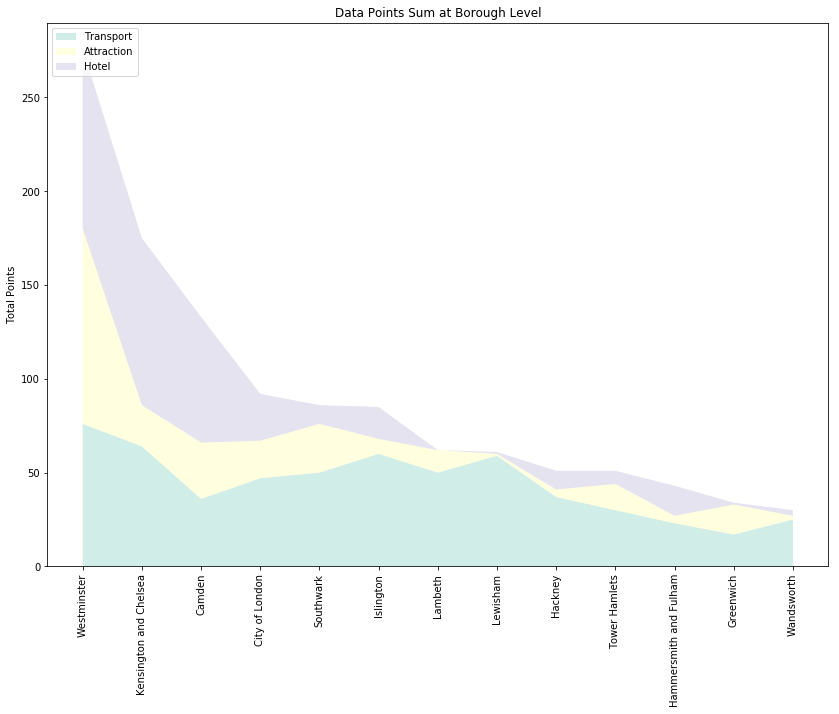

In [87]:
# set x and y axis
x=figures['District'].values.tolist()
y=[figures['Transport'].values.tolist(),figures['Attraction'].values.tolist(),figures['Hotel'].values.tolist()]

pal=sns.color_palette('Set3')
plt.stackplot(x,y,labels=['Transport','Attraction','Hotel'],colors=pal,alpha=0.4)

# rotate the x label for 90°
plt.xticks(rotation=90)

plt.title('Data Points Sum at Borough Level')
plt.ylabel('Total Points')

plt.legend(loc='upper left')
plt.show()

#### Neighborhood Level 

In [52]:
figures2=pd.DataFrame()
figures2=pd.merge(area_trans,area_hotel,how='left',on='area')
figures2=pd.merge(figures2,area_attra,how='left',on='area')

In [53]:
figures2.columns=['Area','Transport','Hotel','Attraction']
figures2

Area  Transport  Hotel  Attraction
0                        Abbey Road          3    NaN         1.0
1                        Abbey Wood          1    NaN         1.0
2                          Abingdon          2    6.0         NaN
3                           Addison          1    4.0         NaN
4                        Aldersgate          1    NaN         4.0
5                           Aldgate          2    NaN         1.0
6          Avonmore and Brook Green          9    3.0         NaN
7                            Balham          1    NaN         NaN
8                     Bethnal Green          2    1.0         1.0
9                       Bishopsgate          2    1.0         NaN
10                       Blackheath          6    NaN         NaN
11                       Bloomsbury          4   22.0         3.0
12               Borough & Bankside          3    2.0         9.0
13                         Bow West          1    NaN         NaN
14                     Bread Street          3    NaN         1.0
15                           Bridge          3    NaN         NaN
16                     Brixton Hill          3    NaN         1.0
17                         Brockley          5    NaN         NaN
18                    Bromley North          5    1.0         NaN
19             Brompton & Hans Town         13    9.0         6.0
20                       Brownswood          2    7.0         NaN
21                          Bunhill          7    4.0         2.0
22                 Camberwell Green         10    NaN         NaN
23   Camden Town with Primrose Hill          1    NaN         4.0
24                          Campden          6    4.0         2.0
25                        Canonbury          1    NaN         NaN
26                   Castle Baynard         11    1.0         2.0
27                    Catford South          5    NaN         NaN
28                         Cazenove          2    NaN         NaN
29                         Charlton          1    NaN         NaN
..                              ...        ...    ...         ...
109       St. Katharine's & Wapping          1    1.0         2.0
110                   St. Leonard's          1    NaN         1.0
111                      St. Mary's          6    3.0         NaN
112                     St. Peter's         11    2.0         NaN
113                         Stanley          9    1.0         NaN
114                   Stepney Green          2    NaN         NaN
115                       Stockwell          5    NaN         NaN
116                 Stoke Newington          5    NaN         NaN
117                 Streatham South          5    NaN         NaN
118                   Swiss Cottage          1    NaN         1.0
119                        Sydenham          5    NaN         NaN
120                  Telegraph Hill          3    NaN         NaN
121                     Thamesfield          1    NaN         NaN
122             Thamesmead Moorings          1    NaN         1.0
123                    Thurlow Park          2    NaN         NaN
124                         Tooting          4    NaN         NaN
125                           Tower          8   12.0         2.0
126                            Town          6    NaN         NaN
127                      Tulse Hill          3    NaN         NaN
128                         Vassall          1    NaN         NaN
129                        Victoria          1    NaN         NaN
130                  Vincent Square          2    2.0         2.0
131                         Warwick          7    9.0         4.0
132                        West End         19   16.0        14.0
133                      Westbourne          1    NaN         NaN
134                     Whitechapel          1    NaN         1.0
135                  Woodberry Down          9    2.0         NaN
136                 Woolwich Common          2    NaN         NaN
137              Woolwich Riverside          1    NaN         1.0
138  

In [54]:
figures2['Hotel'].fillna(0,inplace=True)
figures2['Attraction'].fillna(0,inplace=True)
figures2=figures2.set_index('Area')
figures2['row_sum']=figures2.apply(lambda x: x.sum(),axis=1)

In [55]:
figures2.sort_values(by='row_sum',ascending=False,inplace=True)

# select top 20 ranking by row_sum
figures_area=figures2.head(20)
figures_area

Transport  Hotel  Attraction  row_sum
Area                                                            
St. James's                       13   14.0        65.0     92.0
Holborn and Covent Garden         20   22.0         8.0     50.0
West End                          19   16.0        14.0     49.0
Hyde Park                         11   19.0         1.0     31.0
Bloomsbury                         4   22.0         3.0     29.0
Brompton & Hans Town              13    9.0         6.0     28.0
Earl's Court                       3   23.0         1.0     27.0
Lancaster Gate                     3   21.0         1.0     25.0
Tower                              8   12.0         2.0     22.0
Warwick                            7    9.0         4.0     20.0
Royal Hospital                    11    4.0         5.0     20.0
Junction                          14    5.0         0.0     19.0
Marylebone High Street             4   13.0         2.0     19.0
Queen's Gate                       3   13.0         0.0     16.0
Lewisham Central                  14    1.0         0.0     15.0
Holland                            3    7.0         5.0     15.0
Borough & Bankside                 3    2.0         9.0     14.0
Peninsula                         10    1.0         3.0     14.0
Castle Baynard                    11    1.0         2.0     14.0
St. Peter's                       11    2.0         0.0     13.0

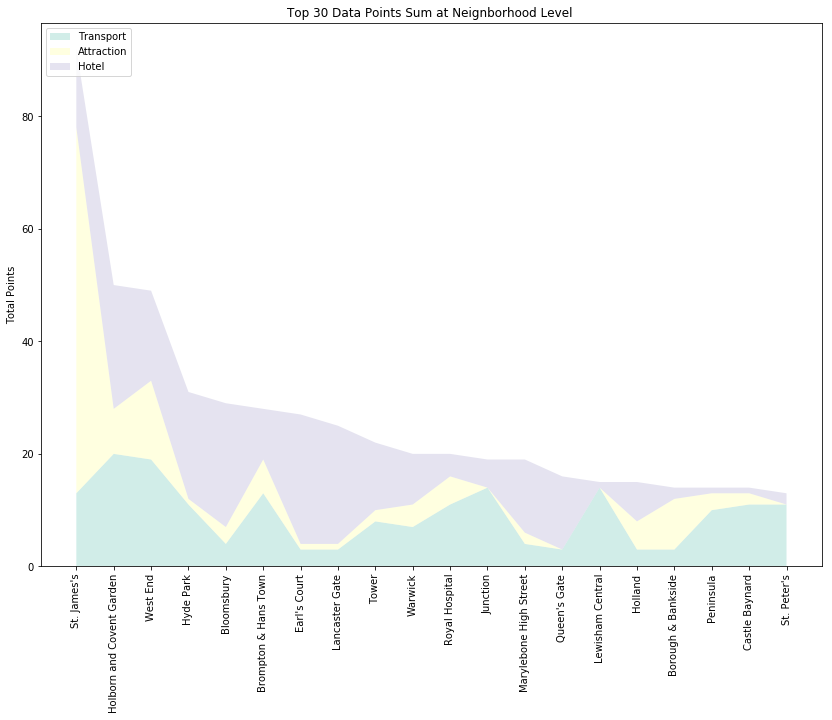

In [76]:
# set x and y axis
figures_area=figures_area.reset_index()

x=figures_area['Area'].values.tolist()
y=[figures_area['Transport'].values.tolist(),figures_area['Attraction'].values.tolist(),figures_area['Hotel'].values.tolist()]

pal=sns.color_palette('Set3')
plt.stackplot(x,y,labels=['Transport','Attraction','Hotel'],colors=pal,alpha=0.4)

# rotate the x label for 90°
plt.xticks(rotation=90)

plt.title('Top 30 Data Points Sum at Neignborhood Level ')
plt.ylabel('Total Points')

plt.legend(loc='upper left')
plt.show()

In [57]:
figures_area.columns=['Area','Transport','Hotel','Attraction','Sum']

####  3.2.2 Bubble Map
#### Neighborhood Level

In [58]:
column_names=['Area','Latitude','Longitude']
figures_area_gps=pd.DataFrame(columns=column_names)

for a in figures_area['Area']:
    area_name=[]
    area_name=a+',London,UK'
    lat_lng_coords=None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis(area_name)
        lat_lng_coords = g.latlng
        
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    #print(latitude,longitude)
    
    figures_area_gps=figures_area_gps.append({'Area':a,
                                              'Latitude':lat_lng_coords[0],
                                              'Longitude':lat_lng_coords[1]},
                                             ignore_index=True)
    
figures_area_gps

Area   Latitude  Longitude
0                 St. James's  51.507820  -0.133560
1   Holborn and Covent Garden  51.511622  -0.122485
2                    West End  51.514140  -0.155100
3                   Hyde Park  51.508280  -0.161390
4                  Bloomsbury  51.520740  -0.123100
5        Brompton & Hans Town  51.500097  -0.162909
6                Earl's Court  51.491870  -0.197280
7              Lancaster Gate  51.511455  -0.179867
8                       Tower  51.611040  -0.109520
9                     Warwick  51.510650  -0.137500
10             Royal Hospital  51.487244  -0.159557
11                   Junction  51.546410  -0.101880
12     Marylebone High Street  51.520495  -0.151844
13               Queen's Gate  51.497937  -0.179631
14           Lewisham Central  51.459160  -0.012130
15                    Holland  51.538491  -0.094923
16         Borough & Bankside  51.508168  -0.095230
17                  Peninsula  51.500819   0.005099
18             Castle Baynard  51.511406  -0.099495
19                St. Peter's  51.431750  -0.113415

In [59]:
figure_bubble=pd.merge(figures_area,figures_area_gps,how='left',on='Area')
figure_bubble

Area  Transport  Hotel  Attraction   Sum   Latitude  \
0                 St. James's         13   14.0        65.0  92.0  51.507820   
1   Holborn and Covent Garden         20   22.0         8.0  50.0  51.511622   
2                    West End         19   16.0        14.0  49.0  51.514140   
3                   Hyde Park         11   19.0         1.0  31.0  51.508280   
4                  Bloomsbury          4   22.0         3.0  29.0  51.520740   
5        Brompton & Hans Town         13    9.0         6.0  28.0  51.500097   
6                Earl's Court          3   23.0         1.0  27.0  51.491870   
7              Lancaster Gate          3   21.0         1.0  25.0  51.511455   
8                       Tower          8   12.0         2.0  22.0  51.611040   
9                     Warwick          7    9.0         4.0  20.0  51.510650   
10             Royal Hospital         11    4.0         5.0  20.0  51.487244   
11                   Junction         14    5.0         0.0  19.0  51.546410   
12     Marylebone High Street          4   13.0         2.0  19.0  51.520495   
13               Queen's Gate          3   13.0         0.0  16.0  51.497937   
14           Lewisham Central         14    1.0         0.0  15.0  51.459160   
15                    Holland          3    7.0         5.0  15.0  51.538491   
16         Borough & Bankside          3    2.0         9.0  14.0  51.508168   
17                  Peninsula         10    1.0         3.0  14.0  51.500819   
18             Castle Baynard         11    1.0         2.0  14.0  51.511406   
19                St. Peter's         11    2.0         0.0  13.0  51.431750   

    Longitude  
0   -0.133560  
1   -0.122485  
2   -0.155100  
3   -0.161390  
4   -0.123100  
5   -0.162909  
6   -0.197280  
7   -0.179867  
8   -0.109520  
9   -0.137500  
10  -0.159557  
11  -0.101880  
12  -0.151844  
13  -0.179631  
14  -0.012130  
15  -0.094923  
16  -0.095230  
17   0.005099  
18  -0.099495  
19  -0.113415

In [60]:
area_dis=borough_trans[['area','district']]
area_dis.columns=['Area','District']
area_dis=area_dis.drop_duplicates()
figure_bubble=pd.merge(figure_bubble,area_dis,how='left',on='Area')
figure_bubble['Area_Dis']=figure_bubble['Area']+', '+figure_bubble['District']

In [61]:
figure_bubble

Area  Transport  Hotel  Attraction   Sum   Latitude  \
0                 St. James's         13   14.0        65.0  92.0  51.507820   
1   Holborn and Covent Garden         20   22.0         8.0  50.0  51.511622   
2                    West End         19   16.0        14.0  49.0  51.514140   
3                   Hyde Park         11   19.0         1.0  31.0  51.508280   
4                  Bloomsbury          4   22.0         3.0  29.0  51.520740   
5        Brompton & Hans Town         13    9.0         6.0  28.0  51.500097   
6                Earl's Court          3   23.0         1.0  27.0  51.491870   
7              Lancaster Gate          3   21.0         1.0  25.0  51.511455   
8                       Tower          8   12.0         2.0  22.0  51.611040   
9                     Warwick          7    9.0         4.0  20.0  51.510650   
10             Royal Hospital         11    4.0         5.0  20.0  51.487244   
11                   Junction         14    5.0         0.0  19.0  51.546410   
12     Marylebone High Street          4   13.0         2.0  19.0  51.520495   
13               Queen's Gate          3   13.0         0.0  16.0  51.497937   
14           Lewisham Central         14    1.0         0.0  15.0  51.459160   
15                    Holland          3    7.0         5.0  15.0  51.538491   
16         Borough & Bankside          3    2.0         9.0  14.0  51.508168   
17                  Peninsula         10    1.0         3.0  14.0  51.500819   
18             Castle Baynard         11    1.0         2.0  14.0  51.511406   
19                St. Peter's         11    2.0         0.0  13.0  51.431750   
20                St. Peter's         11    2.0         0.0  13.0  51.431750   

    Longitude                District  \
0   -0.133560             Westminster   
1   -0.122485                  Camden   
2   -0.155100             Westminster   
3   -0.161390             Westminster   
4   -0.123100                  Camden   
5   -0.162909  Kensington and Chelsea   
6   -0.197280  Kensington and Chelsea   
7   -0.179867             Westminster   
8   -0.109520          City of London   
9   -0.137500             Westminster   
10  -0.159557  Kensington and Chelsea   
11  -0.101880               Islington   
12  -0.151844             Westminster   
13  -0.179631  Kensington and Chelsea   
14  -0.012130                Lewisham   
15  -0.094923  Kensington and Chelsea   
16  -0.095230               Southwark   
17   0.005099               Greenwich   
18  -0.099495          City of London   
19  -0.113415               Islington   
20  -0.113415           Tower Hamlets   

                                        Area_Dis  
0                       St. James's, Westminster  
1              Holborn and Covent Garden, Camden  
2                          West End, Westminster  
3                         Hyde Park, Westminster  
4                             Bloomsbury, Camden  
5   Brompton & Hans Town, Kensington and Chelsea  
6           Earl's Court, Kensington and Chelsea  
7                    Lancaster Gate, Westminster  
8                          Tower, City of London  
9                           Warwick, Westminster  
10        Royal Hospital, Kensington and Chelsea  
11                           Junction, Islington  
12           Marylebone High Street, Westminster  
13          Queen's Gate, Kensington and Chelsea  
14                    Lewisham Central, Lewisham  
15               Holland, Kensington and Chelsea  
16                 Borough & Bankside, Southwark  
17                          Peninsula, Greenwich  
18                Castle Baynard, City of London  
19                        St. Peter's, Islington  
20                    St. Peter's, Tower Hamlets

In [62]:
bubble_map=folium.Map(location=[51.5073219, -0.1276474], # London location I got from before
                    zoom_start=13)

In [63]:
for index,row in figure_bubble.iterrows():
    grey='#ab7265',
    orange='#f53f16',
    red='#91081A',
    radius = row['Sum']/2
    threshold=row['Sum']
    if threshold <15:
        color = grey
    elif threshold <25:
        color = orange
    else:
        color=red  
    folium.features.CircleMarker([row['Latitude'],
                                 row['Longitude']],
                        radius=radius,
                        color=color,
                        popup=folium.Popup(row['Area_Dis'],parse_html=True,max_width=100),
                        # when text has ' or &,',need to use parse_html=True
                        fill=True).add_to(bubble_map)  
bubble_map.save('bubble_map.html')
bubble_map

### 3.3 Data Clustering - DBSCAN Machine Learning

#### Hotel

In [64]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

In [65]:
#!conda install basemap -y

In [66]:
#! conda install -c conda-forge proj4 -y

In [67]:
#! conda install basemap-data-hires -y

In [68]:
import os
os.environ['PROJ_LIB'] = r'C:/Anaconda/Lib/site-packages/mpl_toolkits/basemap'

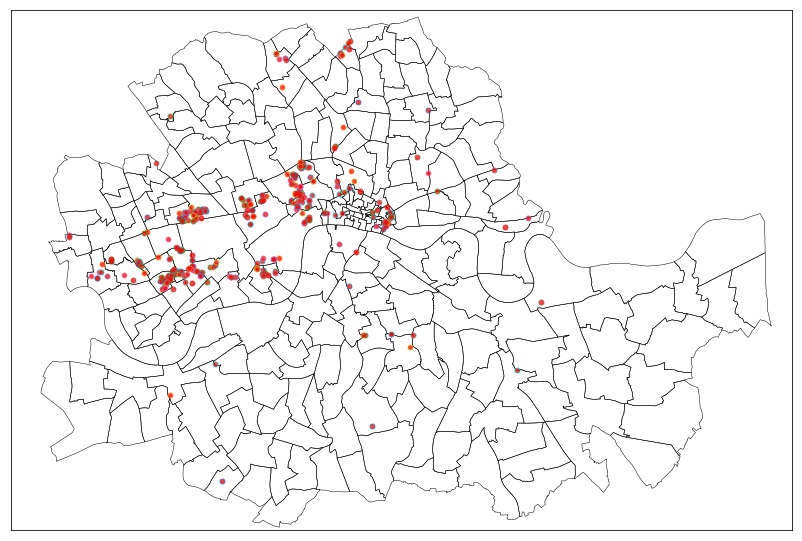

In [69]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10) #展示图片大小

llat=51.41
ulat=51.58
llon=-0.275
ulon=0.135

hotel= borough_hotel

hotel = hotel[(hotel['lng'] > llon) & (hotel['lng'] < ulon) & (hotel['lat'] > llat) &(hotel['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', #area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.readshapefile('Inner London FIN','Inner London FIN') ###非常重要，这个是basemap能够显示底图的关键。前面的是路径，后面的是文件名
   
xs,ys = my_map(np.asarray(hotel.lng), np.asarray(hotel.lat))
hotel['xm']= xs.tolist()
hotel['ym'] =ys.tolist()

#Visualization1
for index,row in hotel.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)

plt.show()


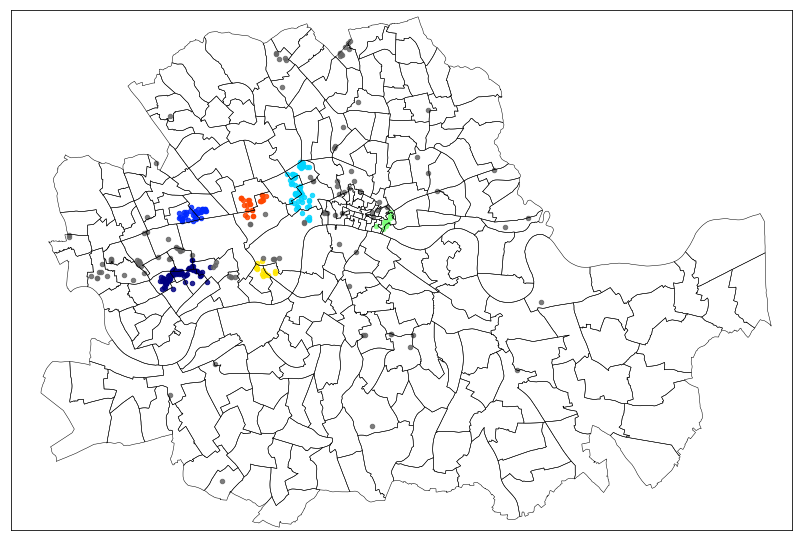

In [70]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = hotel[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
hotel["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

rcParams['figure.figsize'] = (14,10) 

my_map = Basemap(projection='merc',
            resolution = 'l', #area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.readshapefile('Inner London FIN','Inner London FIN')

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = hotel[hotel.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)


#### Attractions

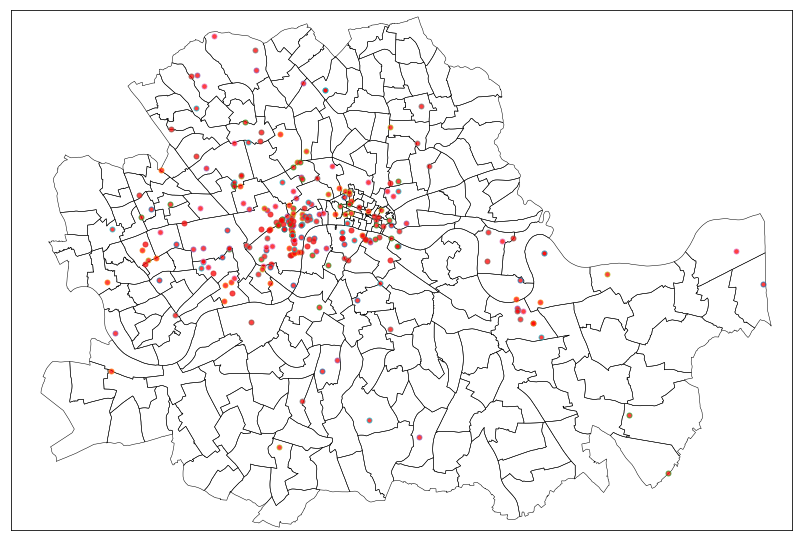

In [71]:
rcParams['figure.figsize'] = (14,10)

llat=51.41
ulat=51.58
llon=-0.275
ulon=0.135

attra=borough_attra

attra = attra[(attra['lng'] > llon) & (attra['lng'] < ulon) & (attra['lat'] > llat) &(attra['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', #area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)


my_map.readshapefile('Inner London FIN','Inner London FIN')

xs,ys = my_map(np.asarray(attra.lng), np.asarray(attra.lat))
attra['xm']= xs.tolist()
attra['ym'] =ys.tolist()

#Visualization1
for index,row in attra.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


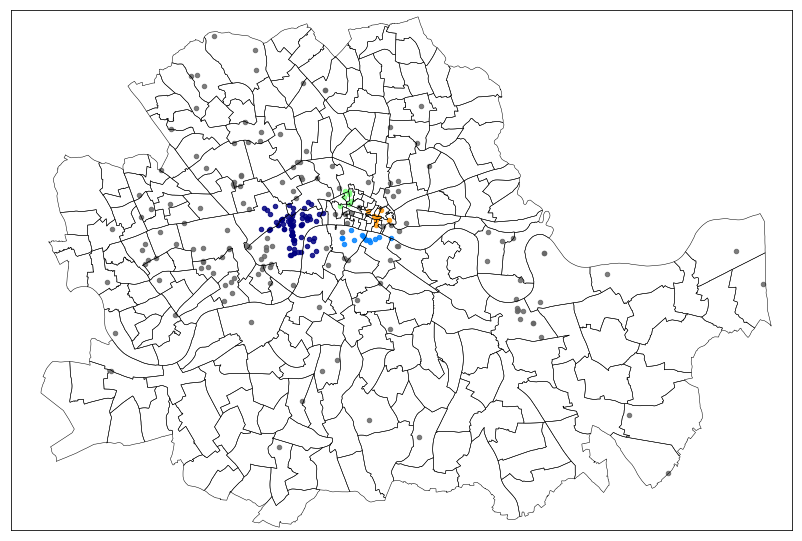

In [72]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = attra[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=7).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
attra["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', 
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.readshapefile('Inner London FIN','Inner London FIN')

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = attra[attra.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)

#### Transports

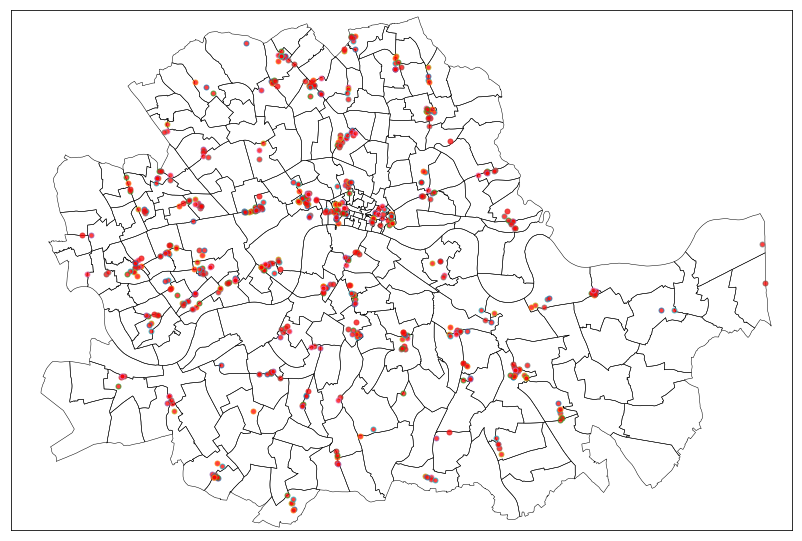

In [73]:
rcParams['figure.figsize'] = (14,10)

llat=51.41
ulat=51.58
llon=-0.275
ulon=0.135

trans=borough_trans

trans = trans[(trans['lng'] > llon) & (trans['lng'] < ulon) & (trans['lat'] > llat) &(trans['lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', #area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)


my_map.readshapefile('Inner London FIN','Inner London FIN')
      
xs,ys = my_map(np.asarray(trans.lng), np.asarray(trans.lat))
trans['xm']= xs.tolist()
trans['ym'] =ys.tolist()

#Visualization1
for index,row in trans.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


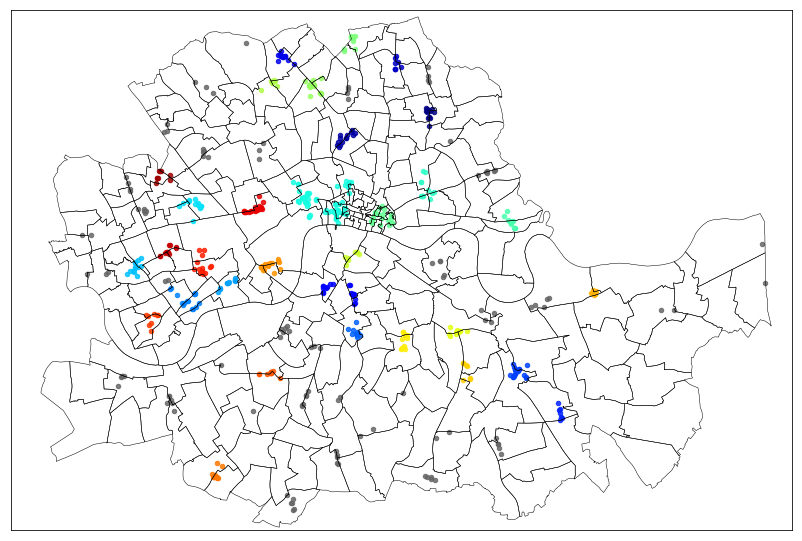

In [74]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = trans[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=7).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
trans["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', 
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.readshapefile('Inner London FIN','Inner London FIN')

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = trans[trans.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)

## 4. Results <a name="results"></a>

As the results from Methodology section, Westminster, Kensington and Chelsea, Camden, City of London and Southwark are the top 5 boroughs when it comes to the sum of hotels, attractions and transports data points. St. James’s, Holborn and Covent Garden, West End, Hyde Park and Bloomsbury are the top 5 neighborhoods when it comes to the sum of hotels, attractions and transports data points.

As it shown in DBSCAN cluser result, most of hotels are clustered together, some attractions and transports locations are also found clustered together.

## 5. Discussion <a name="discussion"></a>

After comparing the DBSCAN results, three areas are found superposed together (See Figure below). In the figure, all of area 1, 2 and 3 have hotel, attraction and transports cluster inside. Compare these three areas with venues_map, it is turned out that area 1 is in City of London Borough; area 2 is in Camden Borough; area 3 is in Westminster Borough. Compare this result with Figure "Data Points Sum at Borough Level", City of London, Camden and Westminster are also listed in the top 5 boroughs. 

More precisely, the area 1 is around the London Fenchurch St, the area 2 is around Bloomsbury neighborhood, the area 3 is around Lancaster Gate neighborhood. 

![title](recommand-3.png)

Besides three datasets overlapping, it can be found that some areas are overlapped by two types of data, see the area 4, 5, 6 and 7 in the figure below. Again, compare these four areas with venues_map, it is turned out that for area 4, half of it is in City of London Borough, half of it is in Islington Borough; area 5 is in Westminster Borough; for area 6, half of it is in Westminster Borough, half of it is in Kensington and Chelsea Borough; area 7 is in Westminster Borough. Again, compare this result with Figure "Data Points Sum at Borough Level", all the boroughs mentioned just now are in the top 5 data points sum at borough level.
More precisely, area 4 is overlapped by attraction and transport data points. It is around City Thameslink. Area 5 is overlapped by hotel and transport data points. It is around Victoria St. Notice that in the figure, even though area 5 just has hotel and transports cluster inside, but it is very close to one of attractions clusters. Area 6 is overlapped by hotel and transport data points. It is around Earl’s Court neighborhood. Area 7 is overlapped by hotel and transport data points. It is around Lancaster Gate.

![title](recommand-4.png)

To summarize, area 1, 2 and 3 are in the first recommendation list to stakeholders who are interested in opening a hotel in Inner London, since all of them have three datasets superposed together. Area 5 is in the second recommendation list to stakeholders since it has hotel and transport overlapped inside and is very close to attractions. Area 4, 6 and 7 are in the third recommendation list to stakeholders since all of them just have two types datasets overlap inside. 

The reason of this recommendation is due to this project uses Hotel agglomeration effect, Accessibility to transports, Tourist Attractions as the key factors for selecting a hotel location. Note that stakeholder probably also needs to consider other conditions, such as real estate price and availability, security and so on. Therefore, the proposed area should only be considered as a starting point for a more detailed analysis.

## 6. Conclusion <a name="conclusion"></a>

This project is aim to find an optimal location for a hotel in Inner London. Foursquare data is used to have an overview of how the hotel, transport and attraction locate in Inner London first. Then, DBSCAN algorism is used to cluster the location data from Foursquare. Superpose three DBSCAN cluster results together to see if there are any overlapping areas. The overlapping areas were marked as the main area of interest. 

This is a starting point for stakeholders, they can ultimately determine the best location for the hotel based on the hotel its own characteristics, for instance, hotel style, hotel target consumers; also the neighborhoods characteristics, for instance, the real estate price and availability, the safety situation around, public service infrastructure and so on.
